In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
# import requests
# import urllib.request
from matplotlib import rc
import seaborn as sns

%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)
# %matplotlib qt

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]



from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [2]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [3]:
tripadv.loc[tripadv.Posted=='8-Jul', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
13716,Petersen Automotive Museum,Los Angeles,8-Jul,0,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,"Clifton, Virginia"
13723,Petersen Automotive Museum,Los Angeles,8-Jul,0,698,101,1,5,"I am NOT AT ALL interested in cars, but I thou...",MUCH better than expected,JdeP,London


In [4]:
tripadv['Posted'] = tripadv['Posted'].apply(lambda x: x.zfill(6))

In [5]:
tripadv['Visited'] = tripadv['Visited'].apply(lambda x: x.zfill(6) if x != '' else None)

In [6]:
tripadv['Posted'] = pd.to_datetime(tripadv['Posted'].astype(str), format='%y-%b')

In [7]:
tripadv.loc[tripadv.Visited=='000000', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
2023,The Art Institute of Chicago,Chicago,2019-05-01,000000,125,42,0,5,A day is not enough for the beautiful artifact...,A day is not enough...,CyprusEffie,"Larnaca, Cyprus"
2203,The Art Institute of Chicago,Chicago,2018-09-01,000000,98,26,0,5,I spent several hours here and still didn’t se...,Amazing,eightohtwo,"Burlington, Vermont"
2535,The Art Institute of Chicago,Chicago,2019-07-01,000000,46,33,1,5,Superb quality and impossible to take all of i...,Could return many times to this museum,JS19772017,"Kansas City, Kansas"
2695,The Art Institute of Chicago,Chicago,2020-01-01,000000,5,0,0,5,You must visit this Chicago staple. They have ...,Fantastic.,jules,"Chicago, Illinois"
2797,The Art Institute of Chicago,Chicago,2019-09-01,000000,43,9,0,5,This museum has a great collection of art from...,Great Art Museum,AdamB16,"Iowa City, Iowa"
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,2,0,0,5,My party of six included my aging parents. Guy...,"""The Guy""",Jeff Cole,"Indianapolis, Indiana"
36470,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,159,54,1,5,The memorial is so moving and beautiful So hea...,A moving must see!,jadehardman1983,"Swinton, United Kingdom"
36621,The National 9/11 Memorial & Museum,New York City,2020-03-01,000000,432,1,3,4,The 9/11 Memorial Museum tour helps give peopl...,The Ideal Learning Experience for Out-of-Towners,Richard L. Entrup,"New York City, New York"
36682,The National 9/11 Memorial & Museum,New York City,2020-06-01,000000,35,73,3,5,This was so beautifully done. From outside at ...,Wow,Jana T,NaN


In [8]:
tripadv['Visited'] = pd.to_datetime(tripadv['Visited'].astype(str), format='%y-%b', errors='coerce')

In [9]:
tripadv.loc[2023,]

Attraction                             The Art Institute of Chicago
City                                                        Chicago
Posted                                          2019-05-01 00:00:00
Visited                                                         NaT
User_Reviews                                                    125
User_Helpful                                                     42
Review_Helpful                                                    0
Rating                                                            5
Text              A day is not enough for the beautiful artifact...
Title                                        A day is not enough...
Username                                                CyprusEffie
User_Location                                       Larnaca, Cyprus
Name: 2023, dtype: object

In [10]:
tripadv.shape

(38294, 12)

In [11]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
8436,Top of the Rock,New York City,2019-09-01,2018-10-01,23,7,1,5,30 Rockefeller Plaza stands nearly 70 floors h...,Best Midtown view,Mark M,"Brooklyn, United States"
4821,The Metropolitan Museum of Art,New York City,2019-05-01,2019-05-01,9,4,0,3,The Met’s website claims 5at for tickets purch...,"Great museum, deceptive advertising regarding ...",Mirrabooka1,NaN
33709,Cloud Gate,Chicago,2019-07-01,2019-07-01,83,8,0,4,Visited the bean. It had been vandalized the n...,It’s the Bean,Cards_Fan_n_Jeep_Man,"Foristell, Missouri"
12147,Universal Studios Hollywood,Los Angeles,2019-04-01,2019-04-01,151,20,0,5,Best way to get there Park in Greek theater pa...,Too much fun !,Paul S,"Las Vegas, Nevada"
26307,North End,Boston,2019-09-01,2019-09-01,6,1,0,5,Street after street of eateries. This is the n...,Little Italy,Maddy,"Fort Lauderdale, Florida"
5950,The Metropolitan Museum of Art,New York City,2019-02-01,2018-07-01,55,12,1,5,Splendid building which is very well organized...,You cannot miss this visit !!,anagracielal2017,"Buenos Aires, Argentina"
5568,The Metropolitan Museum of Art,New York City,2019-06-01,2019-05-01,24,1,0,5,"beautiful pieces of art, the roof is full with...",super experience!!,alison j,NaN
25755,North End,Boston,2018-06-01,2018-06-01,30,16,0,5,worth a visit.. take the Boston Foodie tour if...,yummy from one end to the other!,lululalapaloza,"Morgan Hill, CA"
35333,The National 9/11 Memorial & Museum,New York City,2019-11-01,2019-05-01,4,1,0,5,Highly recommend a visit. I get chills every t...,This place is a wonderful tribute to those we ...,Carolyn L,Concord
4561,The Metropolitan Museum of Art,New York City,2019-02-01,2019-02-01,46,10,0,5,Don’t miss the special exhibit the Met has put...,Dutch paintings,DenBob33,"Sunapee, New Hampshire"


In [12]:
# Split up the location column to grab all possible parts of the location

tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']

tripadv_loc = tripadv_loc.fillna(value='').apply(lambda x: x.astype(str).str.upper())

tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)

tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
3597,The Art Institute of Chicago,Chicago,2019-07-01,2019-07-01,16,4,0,4,"Although this is a comprehensive art museum, t...",The Best of Modern Art,Brad S,LEXINGTON,KENTUCKY,,,
9405,Top of the Rock,New York City,2020-01-01,2020-01-01,5,3,1,5,One of my favorite parts of my first NYC visit...,A MUST,Emily P,,,,,
28350,Fenway Park,Boston,2020-04-01,2019-06-01,13,1,0,5,Fenway Park is a great place to enjoy the trad...,An awesome place to enjoy baseball,Markus H,STADTBERGEN,GERMANY,,,
21463,Museum of Fine Arts,Boston,2017-10-01,2017-10-01,63,21,0,5,"A stunning gallery, well they call it a museum...",World class,Enid S,SAXMUNDHAM,UNITED KINGDOM,,,
3156,The Art Institute of Chicago,Chicago,2019-07-01,2019-07-01,72,21,1,5,We came to see the Impressionists and walked f...,Museum of surprise,ManfredMMarkhof,VIENNA,AUSTRIA,,,
5111,The Metropolitan Museum of Art,New York City,2019-05-01,2019-04-01,289,92,0,5,This was my second visit to the Met Museum. Ev...,Most Amazing Museum I’ve Visited,LuckyPenny8,JACKSONVILLE,FLORIDA,,,
14909,Petersen Automotive Museum,Los Angeles,2017-08-01,2017-07-01,107,18,0,5,Our family tries to stop at different kinds of...,Should be high on your family list,MIke23693,YORKTOWN,VIRGINIA,,,
8964,Top of the Rock,New York City,2019-11-01,2019-11-01,41,25,1,5,Arrived early in the morning. Went in and stra...,Unreal views,Mini1979,WEXFORD,IRELAND,,,
16600,The Wizarding World of Harry Potter,Los Angeles,2019-05-01,2019-05-01,"1,695",385,0,5,"This is just one part of the Studio, but it is...",Part of Universal Studios,cookpias,LOS ANGELES,CALIFORNIA,,,
6092,Empire State Building,New York City,2019-12-01,2019-12-01,30,21,1,5,One of the N.Y.C. “Must do’s”. We went up in t...,Great at night,David M,,,,,


In [13]:
st_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

from collections import Counter

st_abbr = {k.upper(): v for k, v in st_abbr.items()}
st_abbr

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

In [14]:
tripadv['User_Loc2'] = tripadv.User_Loc2.replace(st_abbr)
tripadv

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


## Rating Stats

In [15]:
# Simple stats on whether reviews for Boston were marked helpful

tripadv[tripadv['City']=='New York City'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
Attraction,,,,,
Central Park,7542,1,5,4.803822,0.482701
Empire State Building,8570,1,5,4.595174,0.861478
The Metropolitan Museum of Art,9526,1,5,4.774937,0.603379
The National 9/11 Memorial & Museum,9069,1,5,4.852327,0.516972
Top of the Rock,9014,1,5,4.541058,0.843889


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [16]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
38114,Central Park,New York City,2020-03-01,2020-03-01,19,0,0,5,Gorgeous day in the upper 60’s - everyone at t...,Nice day to sit and relax,Bunnyfer,SEATTLE,WA,,,
22855,Boston Tea Party Ships & Museum,Boston,2017-07-01,2016-08-01,33,7,0,Poor,Arrived 30 minutes in advance and we were able...,Entertaining historical snippit,John H,SEATTLE,WA,,,
21985,Museum of Fine Arts,Boston,2018-10-01,2018-09-01,256,69,0,5,The whole museum is very modern and top notch....,top notch!,Beverlz,OAKVILLE,CANADA,,,
34057,Cloud Gate,Chicago,2019-10-01,2019-10-01,8,0,0,5,The Cloud Gate aka The Bean is always a great ...,Always Shining,PamB,PONCHATOULA,LA,,,
34155,Cloud Gate,Chicago,2019-11-01,2019-09-01,39,4,0,4,It was a cool surprise walking down the street...,Expect a crowd but totally worth it!,dcjones2016,WILMINGTON,NC,,,
7452,Empire State Building,New York City,2020-03-01,2020-02-01,1,0,0,Poor,One of the ladies in the photo section was ext...,Bad service,arletyoliva,MIAMI,FL,,,
26997,Fenway Park,Boston,2018-12-01,2018-08-01,15,4,0,4,Went to see the Sox v the Yankees. It was a gr...,Awesome experience,Donald B,,,,,
23088,Boston Tea Party Ships & Museum,Boston,2017-09-01,2017-09-01,16,3,0,5,We learned additional factual history of this ...,Throw the Tea overboard!,Larry P,HAWTHORNE,NY,UNITED STATES,,
30548,Museum of Science and Industry,Chicago,2019-07-01,2019-07-01,1,0,0,5,An amazing museum that one could spend weeks v...,Great and huge museum with recent updates,Jolyon,,,,,
4755,The Metropolitan Museum of Art,New York City,2020-05-01,2019-10-01,404,157,0,4,A great attraction for any art lover. My daugh...,Great attraction for art lovers,conrad169,MACCLESFIELD,UNITED KINGDOM,,,


# Analyzing New York

### Analyzing by Rating (5 stars, 4 stars, Poor)

In [17]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='New York City') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
7661,Empire State Building,New York City,2020-07-01,2020-07-01,5,0,0,5,Great buildup to the Top. Great value for the ...,Empire State Building,Rich T,TAMPA,FL,,,
5034,The Metropolitan Museum of Art,New York City,2019-03-01,2019-03-01,77,26,0,5,This is by far a must see in NYC. Located in a...,Loved looking at the museum,SheilaHollywood,COOPER CITY,FL,,,
7539,Empire State Building,New York City,2020-03-01,2020-03-01,21,9,0,5,Visited on Monday 9th March at 10ish am. No qu...,Soooo quiet,jac10bath,,,,,
8327,Top of the Rock,New York City,2019-08-01,2019-08-01,17,3,0,5,A fun way to see the incredible views! It is n...,Great View!,Angela R,JUSTIN,TX,UNITED STATES,,
8522,Top of the Rock,New York City,2019-09-01,2019-09-01,563,198,1,5,Top of the Rock is great and worth every penny...,A must-do activity in New York,Iammmattdoran,MANCHESTER,UNITED KINGDOM,,,
37762,Central Park,New York City,2020-01-01,2019-12-01,18,2,0,5,What a fantastic place to visit while in New Y...,A ‘must’ whist in New York,pmac1969,WARRINGTON,UNITED KINGDOM,,,
5750,The Metropolitan Museum of Art,New York City,2019-07-01,2019-07-01,12,1,0,5,Arrived early because I am not a fan of super ...,Vast,MonieceQuestionmark,,,,,
5428,The Metropolitan Museum of Art,New York City,2019-10-01,2019-05-01,"1,192",175,0,5,Approaching the building is a site in itself. ...,Remarkable!,Slick5276,SALISBURY,NC,,,
36687,The National 9/11 Memorial & Museum,New York City,2020-06-01,2020-02-01,21,7,0,4,I Was a little disappointed with the lack of a...,9/11 museum,trucker22016,MILVERTON,CANADA,,,
7951,Top of the Rock,New York City,2019-07-01,2019-06-01,211,49,0,Poor,This was part of our city pass. It was interes...,Meh,musictrekker,TEMECULA,CA,,,


## Using Word Lemmatizer to Analyze Text Data

### Single Word Analysis

- 5 Star Analysis

In [18]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['new york', 'new york city', '’', "n't", "'s", 'u', 'get',
                                                                        "'m", 'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

fdist_5star = FreqDist(tokens_5star)
fdist_5star.most_common(50)

[('museum', 2832),
 ('view', 2793),
 ('see', 2772),
 ('time', 2738),
 ('day', 2673),
 ('visit', 2335),
 ('park', 2142),
 ('great', 1802),
 ('building', 1604),
 ('one', 1586),
 ('go', 1579),
 ('new', 1486),
 ('top', 1416),
 ('place', 1322),
 ('well', 1318),
 ('amazing', 1313),
 ('experience', 1256),
 ('city', 1219),
 ('york', 1160),
 ('would', 1072),
 ('ticket', 1067),
 ('must', 1065),
 ('tour', 1063),
 ('nyc', 1047),
 ('much', 1039),
 ('take', 1017),
 ('around', 1015),
 ('hour', 1014),
 ('worth', 1013),
 ('central', 1007),
 ('went', 1007),
 ('empire', 1004),
 ('state', 1002),
 ('really', 967),
 ('beautiful', 931),
 ('people', 922),
 ('exhibit', 886),
 ('many', 857),
 ('art', 843),
 ('recommend', 810),
 ('met', 795),
 ('memorial', 786),
 ('lot', 744),
 ('visited', 720),
 ('could', 719),
 ('best', 719),
 ('floor', 702),
 ('good', 691),
 ('u', 668),
 ('rock', 665)]

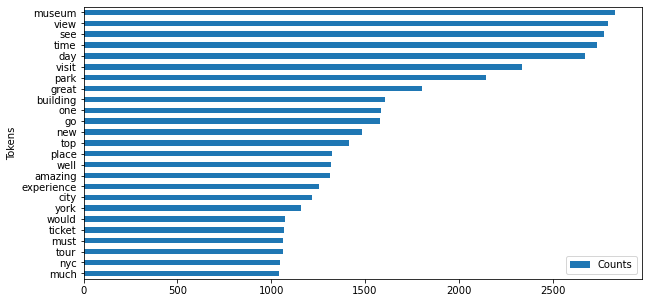

In [19]:
# Graph of Word Count

fdist_5star_graph = pd.DataFrame(fdist_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_5star_graph.invert_yaxis()

- 4 Star Analysis

In [20]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

fdist_4star = FreqDist(tokens_4star)
fdist_4star.most_common(50)

[('view', 739),
 ('time', 484),
 ('see', 442),
 ('park', 394),
 ('day', 393),
 ('great', 377),
 ('visit', 366),
 ('building', 364),
 ('top', 354),
 ('go', 348),
 ('ticket', 325),
 ('museum', 318),
 ('one', 275),
 ('place', 251),
 ('would', 245),
 ('empire', 241),
 ('city', 234),
 ('state', 234),
 ('good', 229),
 ('experience', 215),
 ('new', 215),
 ('line', 214),
 ('around', 201),
 ('really', 198),
 ('people', 197),
 ('went', 194),
 ('worth', 193),
 ('take', 187),
 ('amazing', 180),
 ('nice', 173),
 ('well', 173),
 ('queue', 173),
 ('floor', 170),
 ('york', 168),
 ('hour', 166),
 ('lot', 164),
 ('rock', 162),
 ('central', 157),
 ('much', 156),
 ('way', 150),
 ('many', 146),
 ('beautiful', 142),
 ('like', 140),
 ('could', 138),
 ('nyc', 137),
 ('u', 134),
 ('staff', 134),
 ('tour', 131),
 ('night', 130),
 ('thing', 129)]

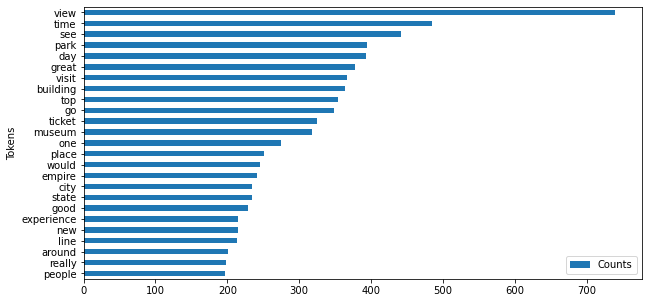

In [21]:
fdist_4star_graph = pd.DataFrame(fdist_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [22]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

fdist_poor = FreqDist(tokens_poor)
fdist_poor.most_common(50)

[('ticket', 303),
 ('time', 263),
 ('view', 262),
 ('people', 249),
 ('line', 201),
 ('go', 193),
 ('museum', 192),
 ('queue', 191),
 ('see', 186),
 ('building', 180),
 ('staff', 174),
 ('top', 172),
 ('would', 162),
 ('one', 160),
 ('u', 147),
 ('floor', 123),
 ('experience', 120),
 ('could', 118),
 ('empire', 118),
 ('state', 114),
 ('visit', 110),
 ('day', 108),
 ('like', 100),
 ('great', 99),
 ('take', 97),
 ('new', 94),
 ('hour', 93),
 ('even', 92),
 ('went', 88),
 ('much', 88),
 ('really', 85),
 ('better', 85),
 ('way', 83),
 ('wait', 83),
 ('many', 82),
 ('good', 82),
 ('got', 81),
 ('sunset', 81),
 ('minute', 80),
 ('elevator', 80),
 ('around', 79),
 ('park', 78),
 ('rude', 77),
 ('money', 76),
 ('told', 76),
 ('security', 76),
 ('lot', 75),
 ('back', 74),
 ('long', 73),
 ('place', 72)]

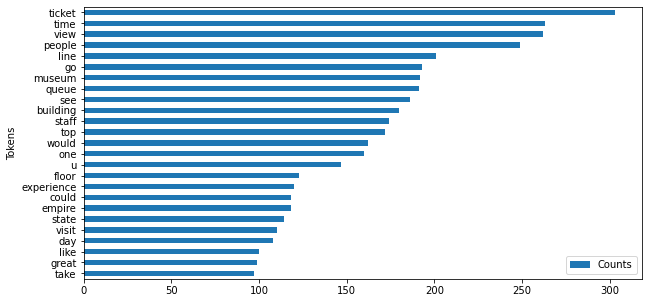

In [23]:
fdist_poor_graph = pd.DataFrame(fdist_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_poor_graph.invert_yaxis()

- We can see that most of the reviews that gave 3 or fewer stars mentioned tours the most

### Bigram Analysis

- 5 Star Analysis

In [24]:
corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('new', 'york'), 1160),
 (('central', 'park'), 985),
 (('empire', 'state'), 949),
 (('state', 'building'), 678),
 (('top', 'rock'), 468),
 (('must', 'see'), 364),
 (('well', 'worth'), 362),
 (('highly', 'recommend'), 292),
 (('much', 'see'), 271),
 (('great', 'view'), 250),
 (('worth', 'visit'), 224),
 (('view', 'city'), 199),
 (('york', 'city'), 198),
 (('well', 'done'), 182),
 (('observation', 'deck'), 171),
 (('would', 'recommend'), 169),
 (('lost', 'life'), 169),
 (('amazing', 'view'), 163),
 (('must', 'visit'), 159),
 (('view', 'top'), 151),
 (('make', 'sure'), 148),
 (('see', 'everything'), 147),
 (('guided', 'tour'), 145),
 (('memorial', 'museum'), 145),
 (('view', 'amazing'), 137),
 (('first', 'time'), 132),
 (('go', 'back'), 131),
 (('walk', 'around'), 129),
 (('best', 'view'), 123),
 (('great', 'place'), 120),
 (('102nd', 'floor'), 120),
 (('one', 'day'), 119),
 (('take', 'time'), 119),
 (('one', 'best'), 119),
 (('86th', 'floor'), 117),
 (('gift', 'shop'), 114),
 (('place'

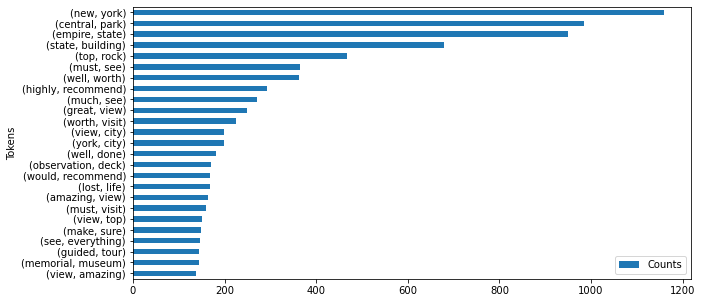

In [25]:
# Graph of 5 Star Bigram

fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

- 4 Star Analysis

In [26]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('empire', 'state'), 226),
 (('state', 'building'), 169),
 (('new', 'york'), 165),
 (('central', 'park'), 154),
 (('top', 'rock'), 126),
 (('great', 'view'), 81),
 (('observation', 'deck'), 50),
 (('view', 'city'), 48),
 (('worth', 'visit'), 47),
 (('view', 'top'), 46),
 (('86th', 'floor'), 41),
 (('well', 'worth'), 40),
 (('view', 'amazing'), 32),
 (('view', 'great'), 29),
 (('must', 'see'), 28),
 (('great', 'experience'), 28),
 (('amazing', 'view'), 28),
 (('time', 'slot'), 28),
 (('clear', 'day'), 27),
 (('view', 'central'), 27),
 (('great', 'place'), 26),
 (('york', 'city'), 26),
 (('would', 'recommend'), 26),
 (('walk', 'around'), 25),
 (('must', 'visit'), 25),
 (('view', 'empire'), 25),
 (('good', 'view'), 24),
 (('much', 'see'), 23),
 (('many', 'people'), 23),
 (('definitely', 'worth'), 23),
 (('make', 'sure'), 23),
 (('nice', 'view'), 23),
 (('one', 'world'), 23),
 (('gift', 'shop'), 22),
 (('view', 'spectacular'), 21),
 (('buy', 'ticket'), 21),
 (('see', 'empire'), 21),
 (('

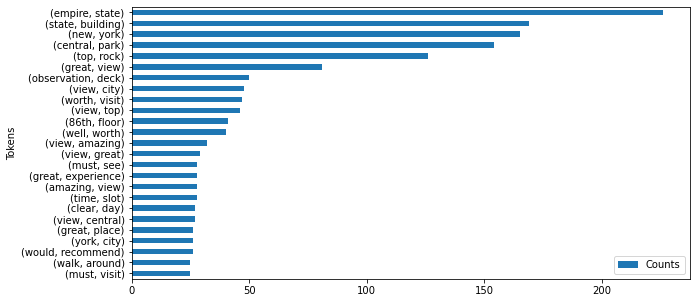

In [27]:
# Graph of 4 Star Bigram

fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [28]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('empire', 'state'), 110),
 (('state', 'building'), 79),
 (('new', 'york'), 57),
 (('top', 'rock'), 54),
 (('many', 'people'), 33),
 (('central', 'park'), 26),
 (('86th', 'floor'), 25),
 (('observation', 'deck'), 25),
 (('great', 'view'), 24),
 (('much', 'better'), 21),
 (('customer', 'service'), 21),
 (('gift', 'shop'), 20),
 (('102nd', 'floor'), 19),
 (('even', 'though'), 18),
 (('skip', 'line'), 17),
 (('time', 'slot'), 17),
 (('bought', 'ticket'), 16),
 (('view', 'great'), 15),
 (('view', 'city'), 15),
 (('2', 'hour'), 14),
 (('ticket', 'online'), 14),
 (('view', 'top'), 14),
 (('another', 'queue'), 14),
 (('line', 'ticket'), 14),
 (('long', 'line'), 13),
 (('30', 'minute'), 13),
 (('take', 'picture'), 12),
 (('80th', 'floor'), 12),
 (('got', 'top'), 12),
 (('see', 'anything'), 12),
 (('express', 'ticket'), 12),
 (('staff', 'member'), 12),
 (('see', 'view'), 12),
 (('come', 'back'), 12),
 (('red', 'carpet'), 12),
 (('queue', 'lift'), 12),
 (('could', 'see'), 11),
 (('city', 'pas'

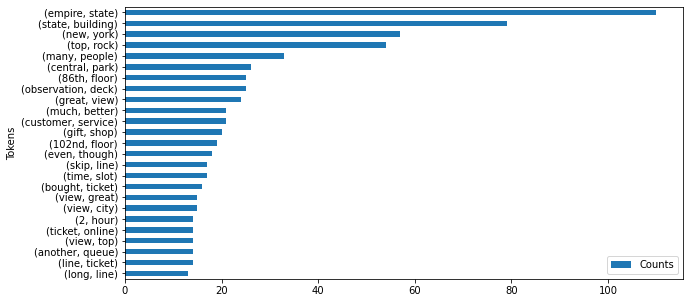

In [29]:
# Graph of Poor Bigram

fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

In [30]:
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('new', 'york'),
 ('central', 'park'),
 ('empire', 'state'),
 ('state', 'building'),
 ('top', 'rock'),
 ('must', 'see'),
 ('well', 'worth'),
 ('highly', 'recommend'),
 ('much', 'see'),
 ('great', 'view'),
 ('worth', 'visit'),
 ('view', 'city'),
 ('york', 'city'),
 ('well', 'done'),
 ('observation', 'deck'),
 ('would', 'recommend'),
 ('lost', 'life'),
 ('amazing', 'view'),
 ('must', 'visit'),
 ('view', 'top'),
 ('make', 'sure'),
 ('see', 'everything'),
 ('guided', 'tour'),
 ('memorial', 'museum'),
 ('view', 'amazing'),
 ('first', 'time'),
 ('go', 'back'),
 ('walk', 'around'),
 ('best', 'view'),
 ('great', 'place'),
 ('102nd', 'floor'),
 ('one', 'day'),
 ('take', 'time'),
 ('one', 'best'),
 ('86th', 'floor'),
 ('gift', 'shop'),
 ('place', 'visit'),
 ('great', 'experience'),
 ('visit', 'new'),
 ('view', 'central'),
 ('3', 'hour'),
 ('tour', 'guide'),
 ('really', 'enjoyed'),
 ('3', 'day'),
 ('king', 'kong'),
 ('view', 'new'),
 ('visit', 'nyc'),
 ('definitely', 'worth'),
 ('visit', 'museum

In [31]:
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('empire', 'state'),
 ('state', 'building'),
 ('new', 'york'),
 ('central', 'park'),
 ('top', 'rock'),
 ('great', 'view'),
 ('observation', 'deck'),
 ('view', 'city'),
 ('worth', 'visit'),
 ('view', 'top'),
 ('86th', 'floor'),
 ('well', 'worth'),
 ('view', 'amazing'),
 ('view', 'great'),
 ('must', 'see'),
 ('great', 'experience'),
 ('amazing', 'view'),
 ('time', 'slot'),
 ('clear', 'day'),
 ('view', 'central'),
 ('great', 'place'),
 ('york', 'city'),
 ('would', 'recommend'),
 ('walk', 'around'),
 ('must', 'visit'),
 ('view', 'empire'),
 ('good', 'view'),
 ('much', 'see'),
 ('many', 'people'),
 ('definitely', 'worth'),
 ('make', 'sure'),
 ('nice', 'view'),
 ('one', 'world'),
 ('gift', 'shop'),
 ('view', 'spectacular'),
 ('buy', 'ticket'),
 ('see', 'empire'),
 ('lot', 'see'),
 ('definitely', 'recommend'),
 ('go', 'back'),
 ('long', 'queue'),
 ('first', 'time'),
 ('carriage', 'ride'),
 ('highly', 'recommend'),
 ('102nd', 'floor'),
 ('view', 'manhattan'),
 ('world', 'trade'),
 ('around', 

In [32]:
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('empire', 'state'),
 ('state', 'building'),
 ('new', 'york'),
 ('top', 'rock'),
 ('many', 'people'),
 ('central', 'park'),
 ('86th', 'floor'),
 ('observation', 'deck'),
 ('great', 'view'),
 ('much', 'better'),
 ('customer', 'service'),
 ('gift', 'shop'),
 ('102nd', 'floor'),
 ('even', 'though'),
 ('skip', 'line'),
 ('time', 'slot'),
 ('bought', 'ticket'),
 ('view', 'great'),
 ('view', 'city'),
 ('2', 'hour'),
 ('ticket', 'online'),
 ('view', 'top'),
 ('another', 'queue'),
 ('line', 'ticket'),
 ('long', 'line'),
 ('30', 'minute'),
 ('take', 'picture'),
 ('80th', 'floor'),
 ('got', 'top'),
 ('see', 'anything'),
 ('express', 'ticket'),
 ('staff', 'member'),
 ('see', 'view'),
 ('come', 'back'),
 ('red', 'carpet'),
 ('queue', 'lift'),
 ('could', 'see'),
 ('city', 'pas'),
 ('number', 'people'),
 ('go', 'top'),
 ('paid', 'extra'),
 ('buy', 'ticket'),
 ('45', 'minute'),
 ('whole', 'experience'),
 ('extremely', 'rude'),
 ('one', 'world'),
 ('long', 'queue'),
 ('security', 'guard'),
 ('15', 'm

In [33]:
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('central', 'park'),
 ('top', 'rock'),
 ('observation', 'deck'),
 ('86th', 'floor'),
 ('102nd', 'floor'),
 ('empire', 'state'),
 ('great', 'view'),
 ('view', 'city'),
 ('gift', 'shop'),
 ('new', 'york'),
 ('view', 'top'),
 ('state', 'building')]

In [34]:
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_5star_count))

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_5star_count_df

12


,Words,5Star_Count
0,"(new, york)",1160
1,"(central, park)",985
2,"(empire, state)",949
3,"(state, building)",678
4,"(top, rock)",468
5,"(great, view)",250
6,"(view, city)",199
7,"(observation, deck)",171
8,"(view, top)",151
9,"(102nd, floor)",120


In [35]:
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_4star_count))

words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_4star_count_df

12


,Words,4Star_Count
0,"(empire, state)",226
1,"(state, building)",169
2,"(new, york)",165
3,"(central, park)",154
4,"(top, rock)",126
5,"(great, view)",81
6,"(observation, deck)",50
7,"(view, city)",48
8,"(view, top)",46
9,"(86th, floor)",41


In [36]:
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]
print(len(words_poor_count))

words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])
words_poor_count_df

12


,Words,Poor_Count
0,"(empire, state)",110
1,"(state, building)",79
2,"(new, york)",57
3,"(top, rock)",54
4,"(central, park)",26
5,"(86th, floor)",25
6,"(observation, deck)",25
7,"(great, view)",24
8,"(gift, shop)",20
9,"(102nd, floor)",19


In [37]:
from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(new, york)",1160,165,57
1,"(central, park)",985,154,26
2,"(empire, state)",949,226,110
3,"(state, building)",678,169,79
4,"(top, rock)",468,126,54
5,"(great, view)",250,81,24
6,"(view, city)",199,48,15
7,"(observation, deck)",171,50,25
8,"(view, top)",151,46,14
9,"(102nd, floor)",120,19,19


In [38]:
count_5star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==5)]['Attraction'])
count_5star_ttl

7457

In [39]:
count_4star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==4)]['Attraction'])
count_4star_ttl

1285

In [40]:
count_poor_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']=='Poor')]['Attraction'])
count_poor_ttl

542

In [41]:
combined_words_df[['5Star_Count']] = combined_words_df[['5Star_Count']]/count_5star_ttl
combined_words_df[['4Star_Count']] = combined_words_df[['4Star_Count']]/count_4star_ttl
combined_words_df[['Poor_Count']] = combined_words_df[['Poor_Count']]/count_poor_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(new, york)",0.155559,0.128405,0.105166
1,"(central, park)",0.132091,0.119844,0.047970
2,"(empire, state)",0.127263,0.175875,0.202952
3,"(state, building)",0.090921,0.131518,0.145756
4,"(top, rock)",0.062760,0.098054,0.099631
5,"(great, view)",0.033526,0.063035,0.044280
6,"(view, city)",0.026686,0.037354,0.027675
7,"(observation, deck)",0.022931,0.038911,0.046125
8,"(view, top)",0.020249,0.035798,0.025830
9,"(102nd, floor)",0.016092,0.014786,0.035055


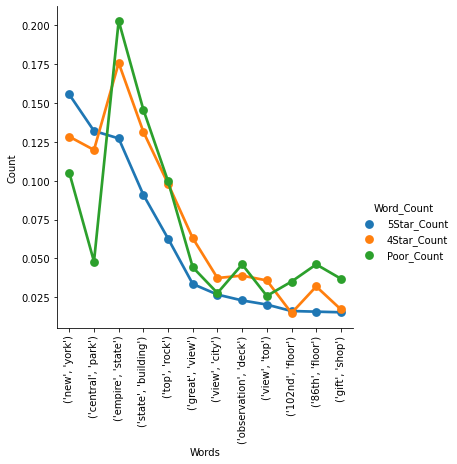

<Figure size 720x360 with 0 Axes>

In [42]:
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count')
combined_words_df_plot = sns.catplot(x="Words", y="Count", hue='Word_Count',
                                     data=combined_words_df_plot, kind='point', 
#                                      alpha = 0.5,
                                     plot_kws=dict(edgecolor="white", linewidth=2.5, alpha=0.3))
plt.figure(figsize=(10,5))
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [43]:
list(set(bigram_words_5star) - set(bigram_words_4star) - set(bigram_words_poor))

[('visiting', 'new'),
 ('lost', 'life'),
 ('tour', 'guide'),
 ('3', 'day'),
 ('place', 'visit'),
 ('visit', 'museum'),
 ('3', 'hour'),
 ('one', 'best'),
 ('visit', 'new'),
 ('one', 'day'),
 ('really', 'enjoyed'),
 ('best', 'view'),
 ('king', 'kong'),
 ('view', 'new'),
 ('well', 'done'),
 ('visit', 'nyc'),
 ('take', 'time'),
 ('guided', 'tour'),
 ('memorial', 'museum')]

In [44]:
list(set(bigram_words_4star) - set(bigram_words_5star) - set(bigram_words_poor))

[('view', 'empire'),
 ('around', 'park'),
 ('good', 'view'),
 ('strawberry', 'field'),
 ('lot', 'see'),
 ('clear', 'day'),
 ('view', 'manhattan'),
 ('view', 'spectacular'),
 ('nice', 'view'),
 ('definitely', 'recommend'),
 ('see', 'empire'),
 ('carriage', 'ride'),
 ('world', 'trade')]

In [45]:
# even taking 'u' and "u" out with the lemmatizer does not actually take the letter out

list(set(bigram_words_poor) - set(bigram_words_4star) - set(bigram_words_5star))

[('see', 'view'),
 ('another', 'queue'),
 ('go', 'top'),
 ('see', 'anything'),
 ('long', 'line'),
 ('queue', 'lift'),
 ('extremely', 'rude'),
 ('red', 'carpet'),
 ('express', 'ticket'),
 ('city', 'pas'),
 ('much', 'better'),
 ('took', 'u'),
 ('got', 'top'),
 ('2', 'hour'),
 ('paid', 'extra'),
 ('security', 'guard'),
 ('take', 'picture'),
 ('bought', 'ticket'),
 ('45', 'minute'),
 ('80th', 'floor'),
 ('line', 'ticket'),
 ('even', 'though'),
 ('staff', 'member'),
 ('30', 'minute'),
 ('could', 'see'),
 ('come', 'back'),
 ('ticket', 'online'),
 ('customer', 'service'),
 ('skip', 'line'),
 ('whole', 'experience'),
 ('number', 'people'),
 ('15', 'minute')]

# Trigram Analysis

In [46]:
# 5 Star Analysis

trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('empire', 'state', 'building'), 674),
 (('new', 'york', 'city'), 198),
 (('view', 'central', 'park'), 110),
 (('visit', 'new', 'york'), 107),
 (('well', 'worth', 'visit'), 106),
 (('view', 'new', 'york'), 99),
 (('visiting', 'new', 'york'), 96),
 (('view', 'empire', 'state'), 86),
 (('would', 'highly', 'recommend'), 83),
 (('visit', 'empire', 'state'), 61),
 (('trip', 'new', 'york'), 54),
 (('see', 'new', 'york'), 51),
 (('metropolitan', 'museum', 'art'), 49),
 (('see', 'empire', 'state'), 49),
 (('top', 'empire', 'state'), 46),
 (('around', 'central', 'park'), 43),
 (('see', 'central', 'park'), 42),
 (('would', 'definitely', 'recommend'), 42),
 (('world', 'trade', 'center'), 41),
 (('better', 'empire', 'state'), 41),
 (('view', 'top', 'rock'), 40),
 (('visited', 'empire', 'state'), 39),
 (('9/11', 'memorial', 'museum'), 39),
 (('360', 'degree', 'view'), 38),
 (('visit', 'central', 'park'), 37),
 (('definitely', 'worth', 'visit'), 37),
 (('central', 'park', 'empire'), 37),
 (('park'

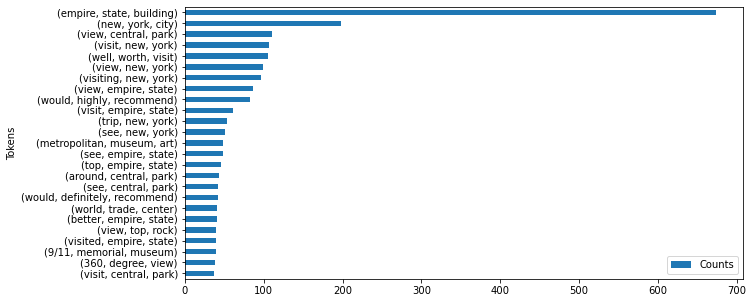

In [47]:
# Graph of 5 Star Trigram

fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [48]:
# 4 Star Analysis

trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('empire', 'state', 'building'), 169),
 (('new', 'york', 'city'), 26),
 (('view', 'central', 'park'), 26),
 (('view', 'empire', 'state'), 25),
 (('see', 'empire', 'state'), 21),
 (('view', 'new', 'york'), 17),
 (('well', 'worth', 'visit'), 13),
 (('view', 'top', 'rock'), 13),
 (('new', 'york', 'pas'), 12),
 (('visiting', 'new', 'york'), 12),
 (('top', 'empire', 'state'), 11),
 (('visit', 'new', 'york'), 10),
 (('better', 'empire', 'state'), 10),
 (('definitely', 'worth', 'visit'), 9),
 (('see', 'new', 'york'), 9),
 (('would', 'definitely', 'recommend'), 9),
 (('world', 'trade', 'center'), 9),
 (('great', 'view', 'city'), 9),
 (('state', 'building', 'one'), 8),
 (('one', 'world', 'trade'), 8),
 (('visited', 'top', 'rock'), 8),
 (('must', 'visit', 'place'), 7),
 (('must', 'new', 'york'), 7),
 (('visited', 'empire', 'state'), 7),
 (('top', 'rock', 'great'), 7),
 (('empire', 'state', 'top'), 7),
 (('central', 'park', 'empire'), 7),
 (('park', 'empire', 'state'), 7),
 (('walk', 'central',

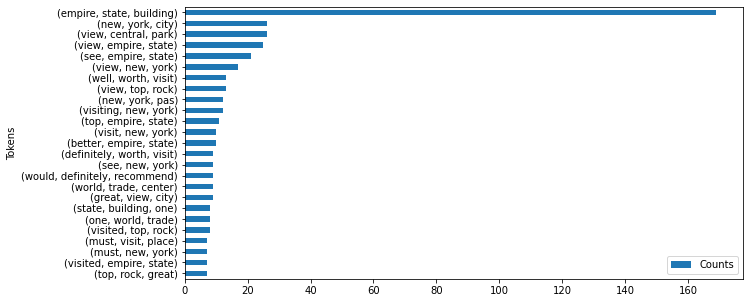

In [49]:
# Graph of 4 Star Trigram

fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [50]:
# Poor Analysis

trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('empire', 'state', 'building'), 79),
 (('visited', 'empire', 'state'), 8),
 (('skip', 'line', 'ticket'), 6),
 (('view', 'empire', 'state'), 6),
 (('see', 'empire', 'state'), 6),
 (('better', 'empire', 'state'), 6),
 (('view', 'new', 'york'), 5),
 (('new', 'york', 'city'), 5),
 (('one', 'world', 'observatory'), 5),
 (('another', '30', 'minute'), 5),
 (('view', 'central', 'park'), 5),
 (('visit', 'central', 'park'), 4),
 (('elevator', '86th', 'floor'), 4),
 (('bought', 'ticket', 'online'), 4),
 (('let', 'many', 'people'), 4),
 (('go', '102nd', 'floor'), 4),
 (('far', 'many', 'people'), 4),
 (('see', 'new', 'york'), 4),
 (('paid', 'extra', 'sunset'), 4),
 (('visit', 'new', 'york'), 3),
 (('item', 'gift', 'shop'), 3),
 (('able', 'see', 'anything'), 3),
 (('bought', 'ticket', 'advance'), 3),
 (('view', 'great', 'though'), 3),
 (('time', 'empire', 'state'), 3),
 (('ticket', 'empire', 'state'), 3),
 (('state', 'building', 'however'), 3),
 (('could', 'barely', 'see'), 3),
 (('queue', '2', '

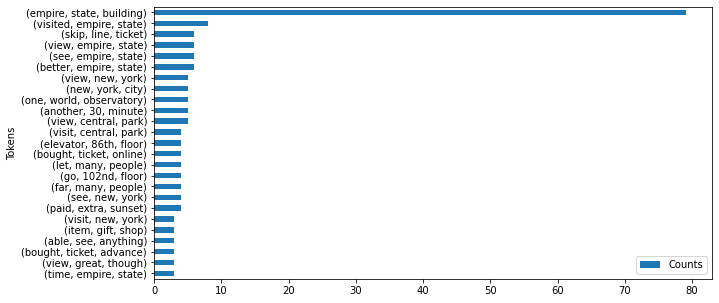

In [51]:
# Graph of Poor Bigram

fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [52]:
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('empire', 'state', 'building'),
 ('new', 'york', 'city'),
 ('view', 'central', 'park'),
 ('visit', 'new', 'york'),
 ('well', 'worth', 'visit'),
 ('view', 'new', 'york'),
 ('visiting', 'new', 'york'),
 ('view', 'empire', 'state'),
 ('would', 'highly', 'recommend'),
 ('visit', 'empire', 'state'),
 ('trip', 'new', 'york'),
 ('see', 'new', 'york'),
 ('metropolitan', 'museum', 'art'),
 ('see', 'empire', 'state'),
 ('top', 'empire', 'state'),
 ('around', 'central', 'park'),
 ('see', 'central', 'park'),
 ('would', 'definitely', 'recommend'),
 ('world', 'trade', 'center'),
 ('better', 'empire', 'state'),
 ('view', 'top', 'rock'),
 ('visited', 'empire', 'state'),
 ('9/11', 'memorial', 'museum'),
 ('360', 'degree', 'view'),
 ('visit', 'central', 'park'),
 ('definitely', 'worth', 'visit'),
 ('central', 'park', 'empire'),
 ('park', 'empire', 'state'),
 ('new', 'york', 'pas'),
 ('people', 'lost', 'life'),
 ('horse', 'carriage', 'ride'),
 ('museum', 'well', 'done'),
 ('horse', 'drawn', 'carriage')

In [53]:
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('empire', 'state', 'building'),
 ('new', 'york', 'city'),
 ('view', 'central', 'park'),
 ('view', 'empire', 'state'),
 ('see', 'empire', 'state'),
 ('view', 'new', 'york'),
 ('well', 'worth', 'visit'),
 ('view', 'top', 'rock'),
 ('new', 'york', 'pas'),
 ('visiting', 'new', 'york'),
 ('top', 'empire', 'state'),
 ('visit', 'new', 'york'),
 ('better', 'empire', 'state'),
 ('definitely', 'worth', 'visit'),
 ('see', 'new', 'york'),
 ('would', 'definitely', 'recommend'),
 ('world', 'trade', 'center'),
 ('great', 'view', 'city'),
 ('state', 'building', 'one'),
 ('one', 'world', 'trade'),
 ('visited', 'top', 'rock'),
 ('must', 'visit', 'place'),
 ('must', 'new', 'york'),
 ('visited', 'empire', 'state'),
 ('top', 'rock', 'great'),
 ('empire', 'state', 'top'),
 ('central', 'park', 'empire'),
 ('park', 'empire', 'state'),
 ('walk', 'central', 'park'),
 ('city', 'central', 'park'),
 ('least', 'half', 'day'),
 ('would', 'highly', 'recommend'),
 ('one', 'world', 'observatory'),
 ('view', 'across',

In [54]:
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('empire', 'state', 'building'),
 ('visited', 'empire', 'state'),
 ('skip', 'line', 'ticket'),
 ('view', 'empire', 'state'),
 ('see', 'empire', 'state'),
 ('better', 'empire', 'state'),
 ('view', 'new', 'york'),
 ('new', 'york', 'city'),
 ('one', 'world', 'observatory'),
 ('another', '30', 'minute'),
 ('view', 'central', 'park'),
 ('visit', 'central', 'park'),
 ('elevator', '86th', 'floor'),
 ('bought', 'ticket', 'online'),
 ('let', 'many', 'people'),
 ('go', '102nd', 'floor'),
 ('far', 'many', 'people'),
 ('see', 'new', 'york'),
 ('paid', 'extra', 'sunset'),
 ('visit', 'new', 'york'),
 ('item', 'gift', 'shop'),
 ('able', 'see', 'anything'),
 ('bought', 'ticket', 'advance'),
 ('view', 'great', 'though'),
 ('time', 'empire', 'state'),
 ('ticket', 'empire', 'state'),
 ('state', 'building', 'however'),
 ('could', 'barely', 'see'),
 ('queue', '2', 'hour'),
 ('yet', 'another', 'queue'),
 ('world', 'trade', 'center'),
 ('another', 'queue', 'security'),
 ('wait', 'another', '30'),
 ('line', 

In [55]:
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('view', 'top', 'rock'),
 ('world', 'trade', 'center'),
 ('visit', 'new', 'york'),
 ('see', 'empire', 'state'),
 ('view', 'new', 'york'),
 ('view', 'central', 'park'),
 ('visited', 'empire', 'state'),
 ('empire', 'state', 'building'),
 ('better', 'empire', 'state'),
 ('new', 'york', 'city'),
 ('view', 'empire', 'state'),
 ('see', 'new', 'york')]

In [56]:
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_5star_tri_count))

words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])
words_5star_tri_count_df

12


,Words,5Star_Count
0,"(empire, state, building)",674
1,"(new, york, city)",198
2,"(view, central, park)",110
3,"(visit, new, york)",107
4,"(view, new, york)",99
5,"(view, empire, state)",86
6,"(see, new, york)",51
7,"(see, empire, state)",49
8,"(world, trade, center)",41
9,"(better, empire, state)",41


In [57]:
words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_4star_tri_count))


words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])
words_4star_tri_count_df

12


,Words,4Star_Count
0,"(empire, state, building)",169
1,"(new, york, city)",26
2,"(view, central, park)",26
3,"(view, empire, state)",25
4,"(see, empire, state)",21
5,"(view, new, york)",17
6,"(view, top, rock)",13
7,"(visit, new, york)",10
8,"(better, empire, state)",10
9,"(see, new, york)",9


In [58]:
words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50) if tup[0] in trigram_common_words]
print(len(words_poor_tri_count))

words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])
words_poor_tri_count_df

12


,Words,Poor_Count
0,"(empire, state, building)",79
1,"(visited, empire, state)",8
2,"(view, empire, state)",6
3,"(see, empire, state)",6
4,"(better, empire, state)",6
5,"(view, new, york)",5
6,"(new, york, city)",5
7,"(view, central, park)",5
8,"(see, new, york)",4
9,"(visit, new, york)",3


In [59]:
from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(empire, state, building)",674,169,79
1,"(new, york, city)",198,26,5
2,"(view, central, park)",110,26,5
3,"(visit, new, york)",107,10,3
4,"(view, new, york)",99,17,5
5,"(view, empire, state)",86,25,6
6,"(see, new, york)",51,9,4
7,"(see, empire, state)",49,21,6
8,"(world, trade, center)",41,9,3
9,"(better, empire, state)",41,10,6


In [60]:
combined_words_tri_df[['5Star_Count']] = combined_words_tri_df[['5Star_Count']]/count_5star_ttl
combined_words_tri_df[['4Star_Count']] = combined_words_tri_df[['4Star_Count']]/count_5star_ttl
combined_words_tri_df[['Poor_Count']] = combined_words_tri_df[['Poor_Count']]/count_5star_ttl
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(empire, state, building)",0.090385,0.022663,0.010594
1,"(new, york, city)",0.026552,0.003487,0.000671
2,"(view, central, park)",0.014751,0.003487,0.000671
3,"(visit, new, york)",0.014349,0.001341,0.000402
4,"(view, new, york)",0.013276,0.002280,0.000671
5,"(view, empire, state)",0.011533,0.003353,0.000805
6,"(see, new, york)",0.006839,0.001207,0.000536
7,"(see, empire, state)",0.006571,0.002816,0.000805
8,"(world, trade, center)",0.005498,0.001207,0.000402
9,"(better, empire, state)",0.005498,0.001341,0.000805


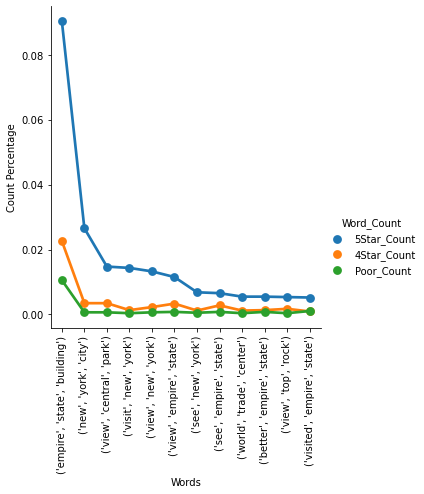

<Figure size 720x360 with 0 Axes>

In [61]:
combined_words_tri_df_plot = combined_words_tri_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_tri_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count', 
                                         data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [62]:
trigram_words_5star_only = list(set(trigram_words_5star) - set(trigram_words_4star) - set(trigram_words_poor))
trigram_words_5star_only

[('metropolitan', 'museum', 'art'),
 ('museum', 'well', 'done'),
 ('could', 'easily', 'spend'),
 ('trip', 'new', 'york'),
 ('horse', 'carriage', 'ride'),
 ('360', 'degree', 'view'),
 ('went', 'top', 'rock'),
 ('staff', 'friendly', 'helpful'),
 ('worth', 'every', 'penny'),
 ('people', 'lost', 'life'),
 ('central', 'park', 'great'),
 ('spent', '3', 'hour'),
 ('central', 'park', 'beautiful'),
 ('horse', 'drawn', 'carriage'),
 ('one', 'best', 'museum'),
 ('9/11', 'memorial', 'museum'),
 ('see', 'central', 'park'),
 ('around', 'central', 'park'),
 ('spend', 'much', 'time'),
 ('must', 'see', 'nyc'),
 ('could', 'spend', 'day')]

In [63]:
trigram_words_4star_only = list(set(trigram_words_4star) - set(trigram_words_5star) - set(trigram_words_poor))
trigram_words_4star_only

[('view', '86th', 'floor'),
 ('empire', 'state', 'top'),
 ('building', 'central', 'park'),
 ('visited', 'top', 'rock'),
 ('would', 'recommend', 'anyone'),
 ('highly', 'recommend', 'visit'),
 ('86th', 'floor', 'great'),
 ('world', 'trade', 'centre'),
 ('view', 'across', 'city'),
 ('must', 'visit', 'place'),
 ('time', 'top', 'rock'),
 ('hustle', 'bustle', 'city'),
 ('state', 'building', 'one'),
 ('city', 'central', 'park'),
 ('top', 'rock', 'great'),
 ('day', 'see', 'everything'),
 ('state', 'building', 'view'),
 ('least', 'half', 'day'),
 ('must', 'new', 'york'),
 ('john', 'lennon', 'memorial')]

In [64]:
trigram_words_poor_only = list(set(trigram_words_poor) - set(trigram_words_5star) - set(trigram_words_4star))
trigram_words_poor_only

[('another', 'queue', 'security'),
 ('skip', 'line', 'ticket'),
 ('staff', 'unbelievably', 'rude'),
 ('top', 'rock', 'sunset'),
 ('go', 'empire', 'state'),
 ('staff', 'top', 'rock'),
 ('far', 'many', 'people'),
 ('impossible', 'see', 'anything'),
 ('line', 'red', 'carpet'),
 ('yet', 'another', 'queue'),
 ('done', 'empire', 'state'),
 ('wait', 'another', '30'),
 ('paid', 'extra', 'sunset'),
 ('state', 'building', 'however'),
 ('ticket', 'empire', 'state'),
 ('bought', 'ticket', 'online'),
 ('least', '45', 'minute'),
 ('could', 'barely', 'see'),
 ('let', 'many', 'people'),
 ('visiting', 'top', 'rock'),
 ('told', '“', 'show'),
 ('bought', 'ticket', 'advance'),
 ('time', 'empire', 'state'),
 ('queue', '2', 'hour'),
 ('another', '30', 'minute'),
 ('wanted', 'see', 'view'),
 ('go', 'top', 'rock'),
 ('item', 'gift', 'shop'),
 ('view', 'great', 'though'),
 ('many', 'ticket', 'sold'),
 ('go', '102nd', 'floor'),
 ('elevator', '86th', 'floor'),
 ('able', 'see', 'anything'),
 ('another', '20', 'mi

# Analysis of Helpful Reviews

In [65]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
8446,Top of the Rock,New York City,2019-09-01,2019-09-01,200,52,1,5,The views are amazing 39.20 to enter but a mus...,Do it,Thechaser54,,,,,
9657,Top of the Rock,New York City,2020-03-01,2020-02-01,203,101,1,5,"Ticket buying easy, line for lift undiscipline...",Great way to get a bird's eye view of NYC,Richard L,LLANDOVERY,UNITED KINGDOM,,,
5877,The Metropolitan Museum of Art,New York City,2019-04-01,2019-03-01,50,11,1,5,You don’t have to be a fan of fine art to blow...,"Words don’t suffice,",mshope40,NEW YORK CITY,NY,,,
5399,The Metropolitan Museum of Art,New York City,2019-04-01,2019-04-01,203,111,2,5,Loved the Met. The Play It Loud exhibit primar...,Play it Loud Exhibit,rosebank1,SURFERS PARADISE,AUSTRALIA,,,
6337,Empire State Building,New York City,2019-12-01,2019-12-01,30,23,1,4,Iconic place to go. Allow for the time but the...,What a view,Steven W,UPPER MT GRAVATT,AUSTRALIA,,,
5274,The Metropolitan Museum of Art,New York City,2019-10-01,2019-10-01,"1,669",3,19,5,This has definitely got to be one of the best ...,One of the best museum,mo_aiguille,CADDINGTON,UNITED KINGDOM,,,
7609,Empire State Building,New York City,2020-04-01,2020-01-01,80,52,1,4,I took the trip all the way to the 103th floor...,Must see,BarisCmz,BUCHAREST,ROMANIA,,,
34756,Top of the Rock,New York City,2020-01-01,2019-12-01,3,4,1,5,The Rockefeller Center tour was really excitin...,Excellent night view,kumarpalb2017,MILTON KEYNES,UNITED KINGDOM,,,
8724,Top of the Rock,New York City,2019-10-01,2019-09-01,7,7,1,5,We had the tour of the building and also went ...,Great tour at Top of the Rock,tonymiller53,PORTSMOUTH,UNITED KINGDOM,,,
7654,Empire State Building,New York City,2020-07-01,2019-10-01,29,42,2,Poor,Not the place to go if you don't like heights ...,Great View,Berwick,COLCHESTER,UNITED KINGDOM,,,


In [66]:
helpful_total = len(ta_5vspoor_helpful_df)
helpful_total

3497

In [67]:
helpful_5star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5])
helpful_5star

2712

In [68]:
helpful_4star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4])
helpful_4star

522

In [69]:
helpful_poor = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'])
helpful_poor

263

In [70]:
count_5star_ttl

7457

In [71]:
count_4star_ttl

1285

In [72]:
count_poor_ttl

542

In [73]:
# Helpful reviews that gave 5 stars

helpful_5star/count_5star_ttl

0.3636851280675875

In [74]:
# Helpful reviews that gave 4 stars

helpful_4star/count_4star_ttl

0.40622568093385214

In [75]:
# Helpful reviews that gave 3 or fewer stars

helpful_poor/count_poor_ttl

0.48523985239852396

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

In [76]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
8836,Top of the Rock,New York City,2019-10-01,2019-10-01,14,7,1,Poor,PLEASE NOTE: This is the first bad review I've...,Not worth the long lines!!,lalascottgal,NASHVILLE,TN,,,
9057,Top of the Rock,New York City,2019-11-01,2019-11-01,8,5,2,Poor,We paid 10$ more by person to book a ticket du...,Extra fees for sunset but we didn’t see it,Guide572188,,,,,
7517,Empire State Building,New York City,2020-03-01,2019-10-01,73,23,1,Poor,Outstanding view and great architecture. We we...,Beautiful!,Explorer,HAMILTON,CANADA,,,
38080,Central Park,New York City,2020-03-01,2020-02-01,27,16,1,Poor,"Its a nice enough park, probably hyped a bit m...",Park,Barry R,WIGAN,UNITED KINGDOM,,,
9336,Top of the Rock,New York City,2020-01-01,2020-01-01,1,1,1,Poor,"Extreme unpleasant, (1) overcrowded and super ...",Super crowded + Rude staff but Regular sights ...,Victor Borba,,,,,
38090,Central Park,New York City,2020-03-01,2020-03-01,239,42,1,Poor,"Living where I do, this came as mediocre. I do...",It's ok....,Patrick B,KILLARNEY,IRELAND,,,
9356,Top of the Rock,New York City,2020-01-01,2020-01-01,18,24,2,Poor,"Staffmember : ""Smile you are on holidays ! Me ...",Great view but poor management of waiting wit...,frederic92160,PARIS,FRANCE,,,
9263,Top of the Rock,New York City,2019-12-01,2019-12-01,2,4,1,Poor,We had reserved for December 21. Our hotel con...,Will call horror,Ivan H,,,,,
8547,Top of the Rock,New York City,2019-09-01,2019-09-01,42,31,1,Poor,We had to wait over 2.5 hours because it was p...,Night Time View,Karl W,COUNTY MAYO,IRELAND,,,
9359,Top of the Rock,New York City,2020-01-01,NaT,1,1,1,Poor,We got tickets online for a specific time (wit...,"Great view, very poor organization",Jiamei Z,,,,,


In [78]:
ta_5vspoor_helpful_df.loc[9336, 'Text']

'Extreme unpleasant, (1) overcrowded and super disorganized, bought four adults to see the sunset, with the crowds our 4:05 pm tickets we could pass the front door only by 4:25 and get into the top itself be later 4:40. That said obviously lost the sunset ($+10/person). In addition a fourth person was not even able to get into in time due the super line. (2) Staff was super rude - offensive and yelling to us. Disappointed and disrespected. Yes they indeed have a nice sight, but after going to both TOP and Empire Estate I can say that the latter is definitely better (although a small $ premium). Finally do recommend Empire given this disrespect and long lines regular likely experience in the TOP of the Rock.'

In [79]:
ta_5vspoor_helpful_df.head()

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
36729,Central Park,New York City,2020-02-01,2020-01-01,57,38,1,4,We went to the Met and walked through Central ...,Lovely walk,lallum,ALNWICK,UNITED KINGDOM,,,
36730,Central Park,New York City,2020-02-01,2019-12-01,7,6,1,5,We visited on the anniversary of john Lennon's...,Awesome,Gooner73,HARLOW,UNITED KINGDOM,,,
36734,Central Park,New York City,2020-02-01,2020-01-01,110,29,1,Poor,We decided to get off the subway at 110th stre...,Walk through,tracey w,STOKE-ON-TRENT,UNITED KINGDOM,,,
36735,Central Park,New York City,2020-02-01,2019-10-01,82,29,1,4,A quiet refuge in the big city. Fairly safe no...,Quiet Refuge,MyRatings,,,,,
36739,Central Park,New York City,2020-02-01,2019-08-01,95,58,2,5,"We have been several times, even with the pups...",Great walk,asarantidis,BURLINGTON,WA,,,


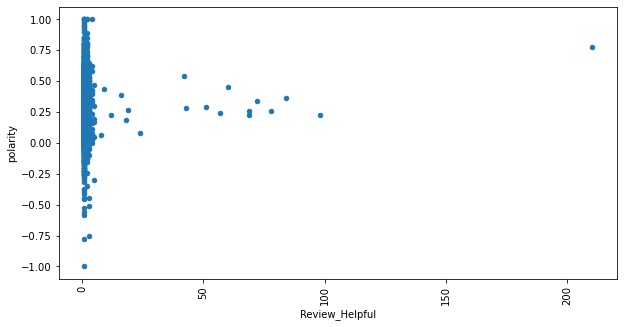

In [80]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_helpful_df)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_5vspoor_helpful_df.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Review_Helpful', 'polarity').tick_params(axis='x', labelrotation = 90)

- Helpful reviews tend to be more positive

### Analysis of Review Text Polarity of the 20 most helpful users

In [81]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
6722,Empire State Building,New York City,2020-01-01,2020-01-01,"3,797",958,3,5,Almost everywhere you turn you can see this Ic...,A,Lambretta101,GOUROCK,UNITED KINGDOM,,,
4023,The Metropolitan Museum of Art,New York City,2019-07-01,2018-08-01,799,951,1,5,The Met Museum is a world class museum that wi...,A great world class museum,Dana Los Angeles,LOS ANGELES,CA,,,
37805,Central Park,New York City,2020-01-01,2020-01-01,"5,692",884,0,Poor,When in NY we always make time to visit Centra...,Such a great park .....BUT,Cudds,CALAHONDA,SPAIN,,,
4761,The Metropolitan Museum of Art,New York City,2019-05-01,2019-05-01,"4,588",840,0,5,It’s as much of a must-see for NYC as the Louv...,"Great collection, great presentation, huge",mrdom,,,,,
38145,Central Park,New York City,2020-03-01,2020-03-01,"5,510",835,0,5,I am now walking here daily since my gym close...,Taking regular walks,neil102,ASTORIA,NY,,,
4505,The Metropolitan Museum of Art,New York City,2020-01-01,2020-01-01,"2,465",799,1,5,The Metropolitan Museum of Art has something l...,"Defies Superlatives, But Find A Way To See Wha...",ElaineAndGreg,CHESTERLAND,OH,,,
8135,Top of the Rock,New York City,2019-07-01,2019-07-01,310,716,1,5,We were there with friends visiting from Austr...,Home run as long as weather is good,wmccfp,STUART,FL,,,
5588,The Metropolitan Museum of Art,New York City,2019-05-01,2019-05-01,"16,039",644,0,5,I am pleased this museum is no 4 in the list o...,The best in NY,TERRAvelista,LONDON,UNITED KINGDOM,,,
5954,The Metropolitan Museum of Art,New York City,2020-01-01,2020-01-01,"1,341",578,0,5,This is an incredible museum with just about e...,You could spend days here,Deanne D,WELLINGTON,NEW ZEALAND,,,
36045,The National 9/11 Memorial & Museum,New York City,2020-01-01,2020-01-01,"1,135",574,1,5,It is amazing to see so many visitors that day...,A heartbreaking reminder of the horrific event,Brown_Samantha,WASHINGTON,,,,


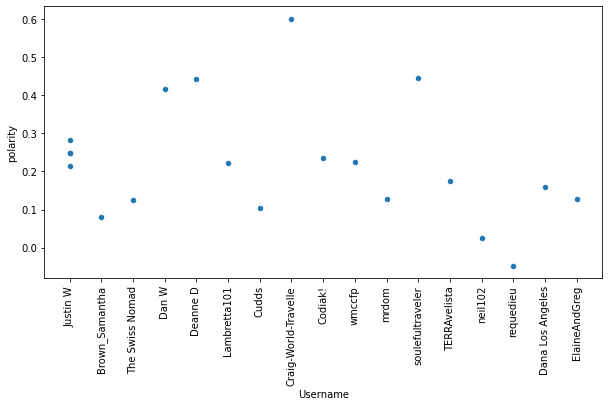

In [82]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [83]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
6722,Lambretta101,958,Empire State Building,Almost everywhere you turn you can see this Ic...
4023,Dana Los Angeles,951,The Metropolitan Museum of Art,The Met Museum is a world class museum that wi...
37805,Cudds,884,Central Park,When in NY we always make time to visit Centra...
4761,mrdom,840,The Metropolitan Museum of Art,It’s as much of a must-see for NYC as the Louv...
38145,neil102,835,Central Park,I am now walking here daily since my gym close...
4505,ElaineAndGreg,799,The Metropolitan Museum of Art,The Metropolitan Museum of Art has something l...
8135,wmccfp,716,Top of the Rock,We were there with friends visiting from Austr...
5588,TERRAvelista,644,The Metropolitan Museum of Art,I am pleased this museum is no 4 in the list o...
5954,Deanne D,578,The Metropolitan Museum of Art,This is an incredible museum with just about e...
36045,Brown_Samantha,574,The National 9/11 Memorial & Museum,It is amazing to see so many visitors that day...


### Dirk W's Reviews and polarity assessment

In [84]:
print(helpful_users_condensed.loc[4543, 'Attraction'])
helpful_users_condensed.loc[4543, 'Text']

The Metropolitan Museum of Art


"I swear I think this is my favorite museum in the world. I have been coming here since I was four years old when I was taken to the Egyptian Galleries as a child. The place is just fun to get lost in. I just visited the new British Galleries on the first floor just beyond the Medieval Wing and they are very impressive. They cover the rise of the British Empire and what imperialism did to the cultures affected and the affluence that the British enjoyed at that time. Some of the works were a little garish but still the craftsmanship was impressive. Don't miss going to the second floor was the newly installed staircase to see the family portraits and silver. The whole section on the rise of Tea Service was impressive as well as the story behind it. Try to go to the late night hours on Friday and Saturday when the museum is quiet. It is the best time to go."

In [85]:
print(helpful_users_condensed.loc[4975, 'Attraction'])
helpful_users_condensed.loc[4975, 'Text']

The Metropolitan Museum of Art


'Many people complain that they don\'t travel enough and see the sites of the world. You don\'t need to do that without ever leaving the Metropolitan Museum of Art probably the BEST art museum in the world. I came in to the "Between the Empire\'s" exhibition and highly recommend everyone to see it before it closes in the middle of the summer. It really is an interesting look at Middle Eastern Art and the influences it had been the Romans and the Parthians. The art work and the perspective of the art is interesting and how the influences reflect in the work over the past centuries. Later that evening I went to hear a lecture on the exhibition by the curators. After that I just walked around the galleries going from the Asian galleries to the Greek Galleries. I had seen the new "Camp Fashion" exhibition during the Members night and it is another exhibition you should not miss. After all this, it was still raining out so I just walked around going from one gallery to another looking at th

In [86]:
print(helpful_users_condensed.loc[5590, 'Attraction'])
helpful_users_condensed.loc[5590, 'Text']

The Metropolitan Museum of Art


'The Met finally reopened after a six month closure due to the COVID_19 pandemic and it was really nice to come back. Some of the museum is still closed to the public and there are limited timed tickets to go so the museum will still feel quite empty but that is even better because you can relax without all the crowds that are normally there. I saw the 150th Birthday exhibition on all the art and the development of the museum which was very interesting but a little preachy. We know how museums were developed and by whom so museum did not have to throw in a guilt trip. The museum was developed by people who were interested in the Arts at that time! Still the museum culled the collection to show various pieces from each time period during the development of the museum and when the pieces entered the museum. That was very interesting on the ways the museum developed each collection and the people who were involved. I was also able to walk the galleries with some piece and quiet. I was abl

In [87]:
print(helpful_users_condensed.loc[5823, 'Attraction'])
helpful_users_condensed.loc[5823, 'Text']

The Metropolitan Museum of Art


"If there is any place to visit in New York City whether it is a long or short visit, the Met is the thing I would recommend the most. There is something for everyone in this museum even if you do not like museums. I went in for the Maximillian Armor Exhibition this evening and it was excellent. I just wondered the halls looking at the various pieces of armor that he had commissioned (and never seemed to pay for) with the most amazing detail work and intricate designs it is hard to believe that they had that type of craftsmanship like that back then. It was a real eye-opener and you should not miss this exhibition. After that I just roamed the halls and looked around and that is the best part of the Met, don't come in with a game plan just relax and walk around and enjoy the art and what speaks out to you. Love it or hate it, it is the best museum in New York City and the world!"

# Text Polarity/Basic Sentiment Analysis

In [88]:
from textblob import TextBlob

sample_size = len(ta_5vspoor)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

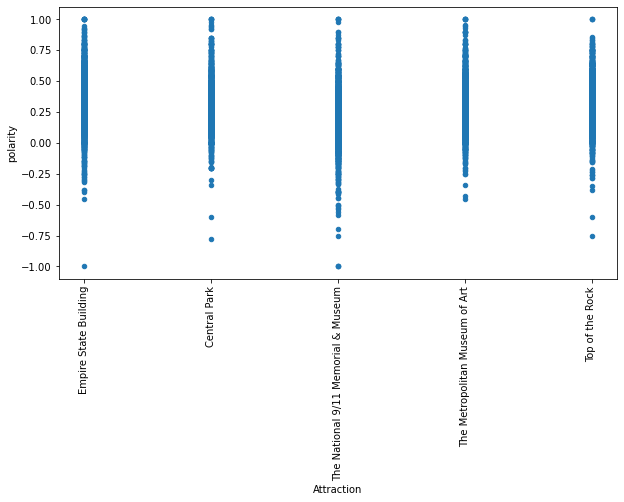

In [89]:
sample = ta_5vspoor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Month and Year

In [90]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
34750,2020-01-01,5
4784,2020-10-01,4
5452,2019-08-01,5
6251,2019-12-01,5
4192,2019-05-01,5
8868,2019-10-01,5
8625,2019-09-01,4
4535,2020-01-01,5
5128,2018-11-01,5
35517,2019-06-01,5


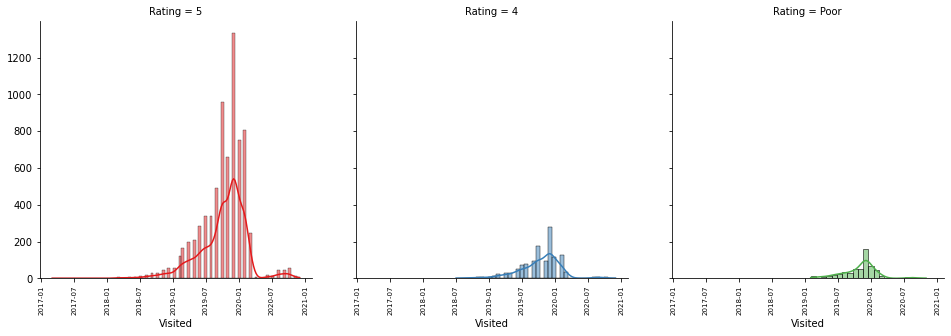

In [93]:
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=4.5, 
                             aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid.map(sns.histplot, "Visited", kde=True)

visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

### Analyzing Ratings of Specific Attractions

In [94]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='The National 9/11 Memorial & Museum')]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
34855,The National 9/11 Memorial & Museum,New York City,2020-12-01,2020-02-01,17,0,0,5,"This broke me... I sat down and cried, it is r...",Never forget... heartbreaking,Harry Steiner,MORRISTOWN,NJ,,,
34856,The National 9/11 Memorial & Museum,New York City,2020-12-01,2020-01-01,25,6,0,5,Well worth a visit. A real eye opener and the ...,Well worth a visit,Frankie S,,,,,
34857,The National 9/11 Memorial & Museum,New York City,2020-11-01,2020-11-01,64,33,0,5,Sad but worthwhile. It's very important to rem...,Worth it,Loonytuna,JACKSONVILLE,FL,,,
34858,The National 9/11 Memorial & Museum,New York City,2020-11-01,2020-10-01,28,31,0,5,I visited the Museum on Halloween 2020. This w...,A Must Do!,GAB711,PENNSYLVANIA,,,,
34859,The National 9/11 Memorial & Museum,New York City,2020-11-01,2019-12-01,35,24,0,5,This museum and memorial were at the top of my...,"Incredibly Sad, but Powerful",smiller324,INDIANAPOLIS,IN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36719,The National 9/11 Memorial & Museum,New York City,2020-10-01,2019-12-01,2,4,1,5,A recommended experience for every New Yorker....,Sad day,Sylvia,NEW YORK CITY,NY,,,
36720,The National 9/11 Memorial & Museum,New York City,2020-10-01,2020-02-01,658,77,2,5,Extremely well done. Moving stories told of th...,Must do,wasmith59,COLLIERVILLE,TN,,,
36721,The National 9/11 Memorial & Museum,New York City,2020-10-01,2020-10-01,13,4,0,5,"Because of COVID-19, the crowd was limited and...",The 9/11 Memorial is a definite must see.,CPoirier,,,,,
36722,The National 9/11 Memorial & Museum,New York City,2020-10-01,2019-11-01,177,94,2,5,"There is so much to say about this museum, not...",The Ultimate tribute,nicole0327,CAMBRIDGE,NY,,,


In [95]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
36576,2020-03-01,5
35824,2019-11-01,5
35182,2019-10-01,Poor
35097,2019-05-01,5
35703,2019-12-01,5
35692,2019-11-01,5
35702,2019-12-01,5
36675,2020-03-01,5
35129,2019-10-01,5
35023,2019-10-01,5


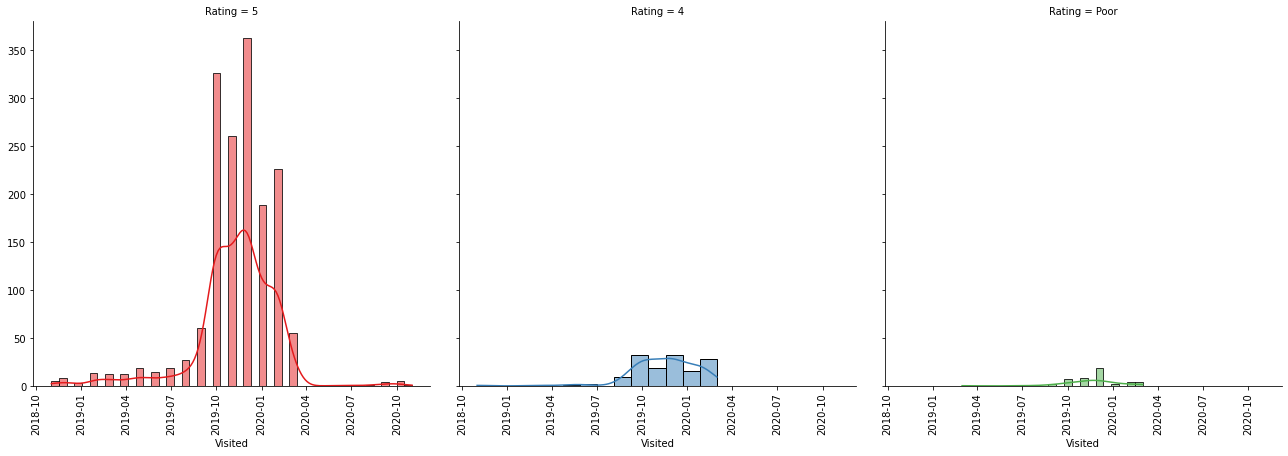

In [96]:
visited_grid_1 = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_1.map(sns.histplot, "Visited", kde=True)

visited_grid_1.set_xticklabels(rotation='vertical', fontsize=10)

- There were fewer poor ratings in the summer/fall of 2019
- This seems to indicate the later reviews may be better overall during the seasonal spike

In [97]:
ta_5vspoor_2 = ta_5vspoor[(ta_5vspoor['Attraction']=='The Metropolitan Museum of Art')]
ta_5vspoor_2

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
3980,The Metropolitan Museum of Art,New York City,2019-08-01,2019-08-01,240,91,0,5,Loved our visit. Would return and return if I ...,10-Oct,Local_lass20,HIGH WYCOMBE,UNITED KINGDOM,,,
3981,The Metropolitan Museum of Art,New York City,2019-04-01,2019-04-01,434,119,0,Poor,This Large museum on one side of Central Park ...,Full afternoon of wonders,Ross G,EDINBURGH,UNITED KINGDOM,,,
3982,The Metropolitan Museum of Art,New York City,2019-04-01,2019-04-01,58,17,0,4,"If you are a baby boomer like me, then the ""Lo...","""Loud Music"" Exhibition",Mark S,OTTSVILLE,PA,,,
3983,The Metropolitan Museum of Art,New York City,2020-03-01,2019-11-01,21,4,0,5,Great exhibition illustrating early scientific...,"""Making Marvels, Science and Splendor at the C...",Eugene Donefer,KINGSTON,CANADA,,,
3984,The Metropolitan Museum of Art,New York City,2019-11-01,2019-11-01,569,96,0,5,Best museum in the world if you are smart. And...,#1 location in NYC. Take a taxi or Uber.,CES122,CANTON,MS,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34780,The Metropolitan Museum of Art,New York City,2020-03-01,2019-06-01,96,68,2,5,I grew up in New York and went to the Met from...,One of the World's greatest art museums!,Howard B,OCEANSIDE,CA,,,
34781,The Metropolitan Museum of Art,New York City,2020-03-01,2020-02-01,126,30,0,5,"Of course the Met is an amazing art museum, th...",Tickets good for 3 days,nbdraleigh61,RALEIGH,NC,,,
34783,The Metropolitan Museum of Art,New York City,2020-03-01,2020-02-01,139,15,0,5,Plan your tour before you start...there are fr...,Do not miss the atriums,njoireading247,JOHNS CREEK,GA,,,
34785,The Metropolitan Museum of Art,New York City,2020-02-01,2020-01-01,109,44,1,4,A go to museum if you like strange art !!based...,It’s ok,Ivanandsuebannister,MAIDSTONE,UNITED KINGDOM,,,


In [98]:
ta_5vspoor_2_df = ta_5vspoor_2.loc[:, ['Visited', 'Rating']]
ta_5vspoor_2_df.sample(15)

,Visited,Rating
4558,2019-03-01,5
5288,2020-02-01,5
5295,2019-12-01,4
4886,2020-01-01,5
4189,2019-08-01,5
4285,2019-03-01,5
5683,2019-08-01,5
4229,2019-12-01,5
4835,2019-03-01,5
4904,2019-05-01,5


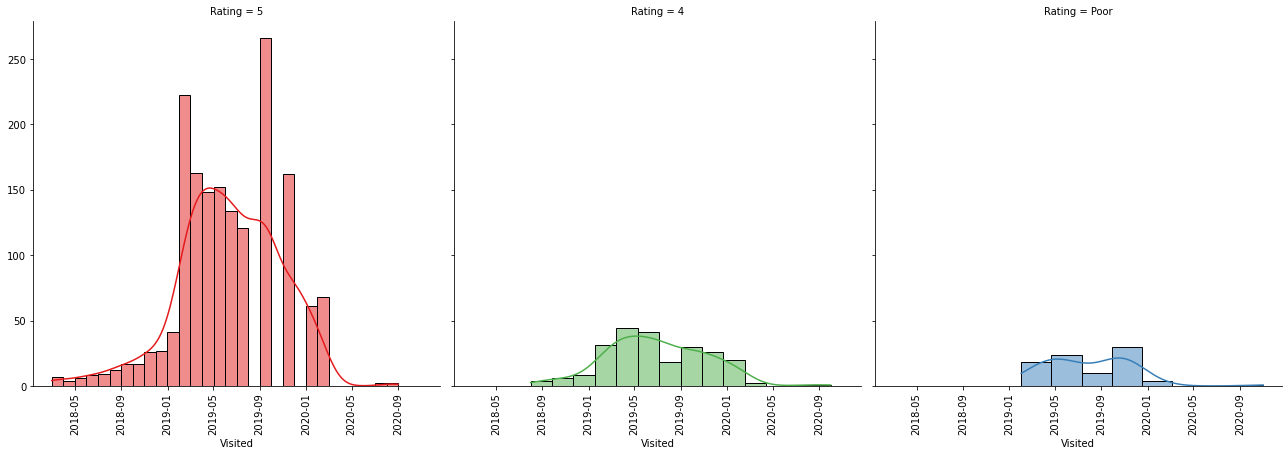

In [99]:
visited_grid_2 = sns.FacetGrid(data=ta_5vspoor_2_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_2.map(sns.histplot, "Visited", kde=True)

visited_grid_2.set_xticklabels(rotation='vertical', fontsize=10)

- Based on what we can see from the poor ratings histogram from Fenway Park, we may be able to conjecture that the significant increase in poor ratings in Boston was caused by this uptake

In [100]:
ta_5vspoor_3 = ta_5vspoor[(ta_5vspoor['Attraction']=='Central Park')]
ta_5vspoor_3

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
36724,Central Park,New York City,2020-12-01,2020-09-01,17,0,0,5,This is one of those amazing places within an ...,Always a relaxing outpost,Harry Steiner,MORRISTOWN,NJ,,,
36725,Central Park,New York City,2020-12-01,2020-12-01,4,0,0,5,"I suggest you take a tour, to take in the top ...","Very large, but what a view",Manuel P,,,,,
36726,Central Park,New York City,2020-12-01,2020-01-01,1,0,0,5,Great place to walk around even when it is fri...,Cold but Good,A Name,,,,,
36727,Central Park,New York City,2020-12-01,2020-12-01,12,0,0,4,"Its always free to go walking around the park,...",FUN DURING COVID,Drea T,,,,,
36728,Central Park,New York City,2020-12-01,2020-01-01,25,6,0,5,The park is well maintained and something to l...,A beautiful place,Frankie S,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38289,Central Park,New York City,2019-10-01,2019-10-01,32,25,2,5,I recommend schedule at least one morning or a...,You must do it!,Milena S,SANTIAGO METROPOLITAN REGION,CHILE,,,
38290,Central Park,New York City,2019-10-01,2019-10-01,140,118,0,5,Such a lovely place to walk around. We walked ...,Brilluant,Michelle C,BOLTON,UNITED KINGDOM,,,
38291,Central Park,New York City,2019-10-01,2019-10-01,247,49,0,5,In the late morning we rented bikes and explor...,Loved the vibe,debdex66,SEATTLE,WA,,,
38292,Central Park,New York City,2019-10-01,2019-10-01,"2,539",218,0,5,We decided to visit Central Park on a Sunday a...,Sunday afternoon delight.,Shayne U,GRAND RAPIDS,MI,,,


In [101]:
ta_5vspoor_3_df = ta_5vspoor_3.loc[:, ['Visited', 'Rating']]
ta_5vspoor_3_df.sample(15)

,Visited,Rating
37681,2019-12-01,5
37671,2019-10-01,4
37448,2019-11-01,5
37207,2019-10-01,5
36747,2020-02-01,4
37919,2019-08-01,4
37007,2019-10-01,5
37791,2019-12-01,5
37394,2019-11-01,5
38272,2020-11-01,5


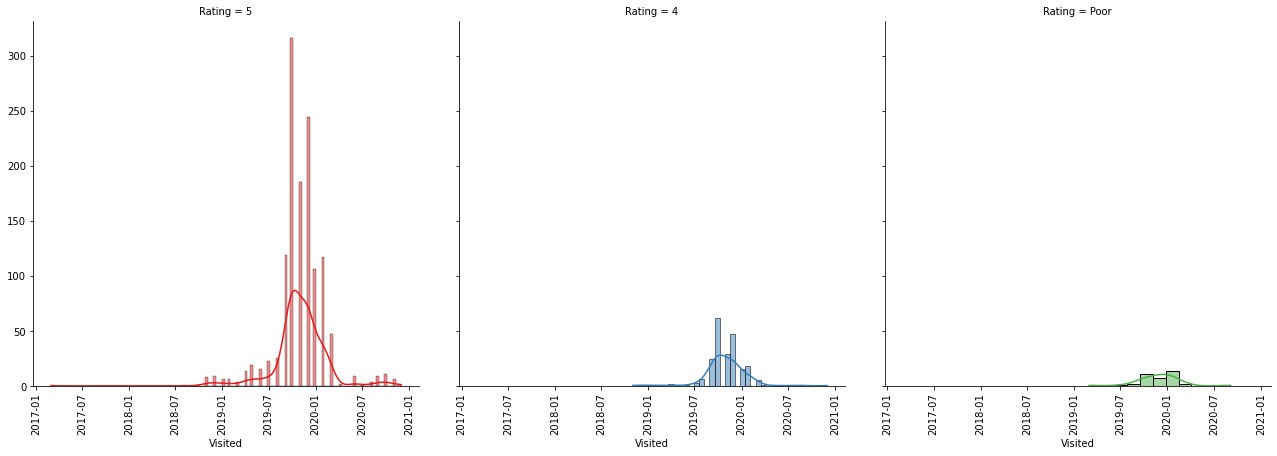

In [102]:
visited_grid_3 = sns.FacetGrid(data=ta_5vspoor_3_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_3.map(sns.histplot, "Visited", kde=True)

visited_grid_3.set_xticklabels(rotation='vertical', fontsize=10)

In [103]:
ta_5vspoor_4 = ta_5vspoor[(ta_5vspoor['Attraction']=='Empire State Building')]
ta_5vspoor_4

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
5,Empire State Building,New York City,2019-12-01,2019-12-01,1,0,0,5,Its a great experience. The view is amazing. t...,Amazing,paldinger2019,NEW YORK CITY,NY,,,
6,Empire State Building,New York City,2019-12-01,2019-12-01,15,4,0,5,Without a doubt the best views in New York Cit...,Breathtaking views,Sarah M,,,,,
7,Empire State Building,New York City,2019-12-01,2019-12-01,6,5,0,5,"Was amazing!! So informative, the King Kong ph...",Empire State Building,Hollie Robyn G,CHATHAM,UNITED KINGDOM,,,
8,Empire State Building,New York City,2019-12-01,2019-12-01,26,19,0,4,We visited one morning in order to book ticket...,lack of information,Lamchop1,AYLESBURY,UNITED KINGDOM,,,
9,Empire State Building,New York City,2019-12-01,2019-12-01,5,2,0,5,"Empire State views were amazing, good security...",Loved it,Cazza,ELLESMERE PORT,UNITED KINGDOM,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,Empire State Building,New York City,2020-12-01,2020-12-01,12,0,0,5,I came to newyork for the holidays and found t...,FUN DURING COVID~ TOURISTS,Drea T,,,,,
7836,Empire State Building,New York City,2020-11-01,2020-10-01,2,0,0,5,"Friendly, helpful staff. Building was beautifu...",Wonderful experience,Linda609,SALT LAKE CITY,UT,,,
7837,Empire State Building,New York City,2020-12-01,2020-01-01,25,5,0,5,Worth a visit and lots of information on the b...,Helpful staff,Frankie S,,,,,
7838,Empire State Building,New York City,2020-12-01,2020-11-01,1,0,0,Poor,We had arranged a visit NY but due to the rigi...,NO REFUND during COVID-19,Vicki S,,,,,


In [104]:
ta_5vspoor_4_df = ta_5vspoor_4.loc[:, ['Visited', 'Rating']]
ta_5vspoor_4_df.sample(15)

,Visited,Rating
7309,NaT,4
6145,2019-12-01,4
6926,2020-01-01,4
6937,2020-01-01,5
7021,2020-01-01,5
7669,2020-08-01,5
7795,2020-10-01,5
6575,2019-12-01,Poor
6309,2019-12-01,5
6306,2019-12-01,Poor


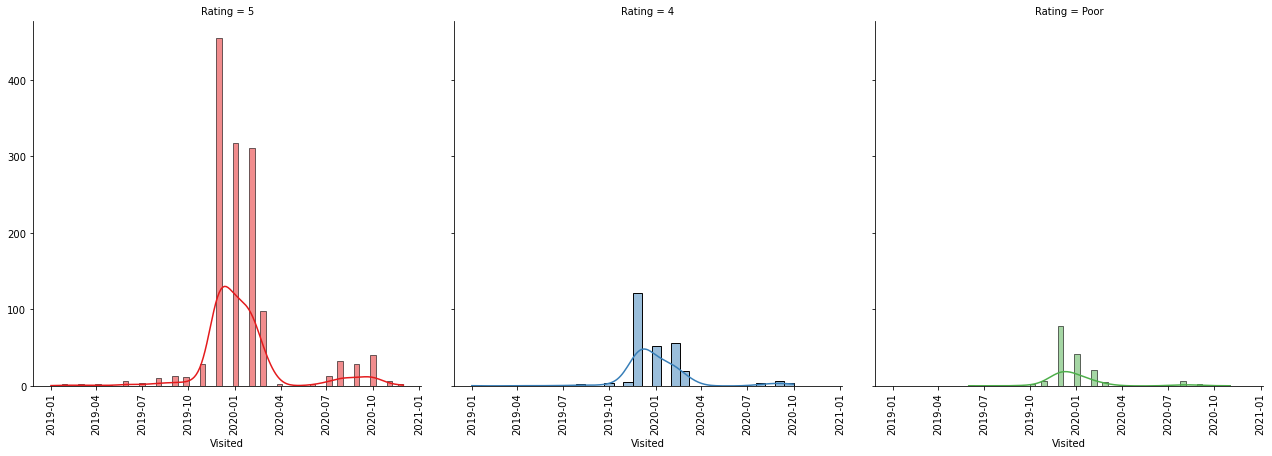

In [105]:
visited_grid_4 = sns.FacetGrid(data=ta_5vspoor_4_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_4.map(sns.histplot, "Visited", kde=True)

visited_grid_4.set_xticklabels(rotation='vertical', fontsize=10)

In [106]:
ta_5vspoor_5 = ta_5vspoor[(ta_5vspoor['Attraction']=='Top of the Rock')]
ta_5vspoor_5

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
7840,Top of the Rock,New York City,2019-06-01,2019-06-01,56,23,0,5,Went to this first thing in the morning and wa...,Best views of new york,Stewart W,MANCHESTER,UNITED KINGDOM,,,
7841,Top of the Rock,New York City,2019-06-01,2019-06-01,79,9,0,5,We did this at day time and got lucky with the...,Fantastic view,AwesomeAlice21,BOREHAM,UNITED KINGDOM,,,
7842,Top of the Rock,New York City,2019-06-01,2019-06-01,36,3,0,5,We've been here before but our 6 year was with...,Amazing view of a GREAT city !,glennsoe,OSLO,NORWAY,,,
7843,Top of the Rock,New York City,2019-06-01,2019-06-01,3,0,0,5,We just recently visit the Top of the Rock and...,Most Beautiful Views,6Blessdva!,,,,,
7844,Top of the Rock,New York City,2019-06-01,2019-06-01,17,6,0,4,good view from top. confusing to find tickets ...,lovely view,ProfJimB,EDMONTON,CANADA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


In [107]:
ta_5vspoor_5_df = ta_5vspoor_5.loc[:, ['Visited', 'Rating']]
ta_5vspoor_5_df.sample(15)

,Visited,Rating
8928,2019-10-01,5
8279,2018-11-01,5
9759,2019-10-01,4
9458,2019-10-01,5
7934,2019-02-01,5
8458,2019-08-01,5
8265,2019-05-01,5
9150,2019-12-01,4
9520,2020-02-01,5
9415,2020-01-01,5


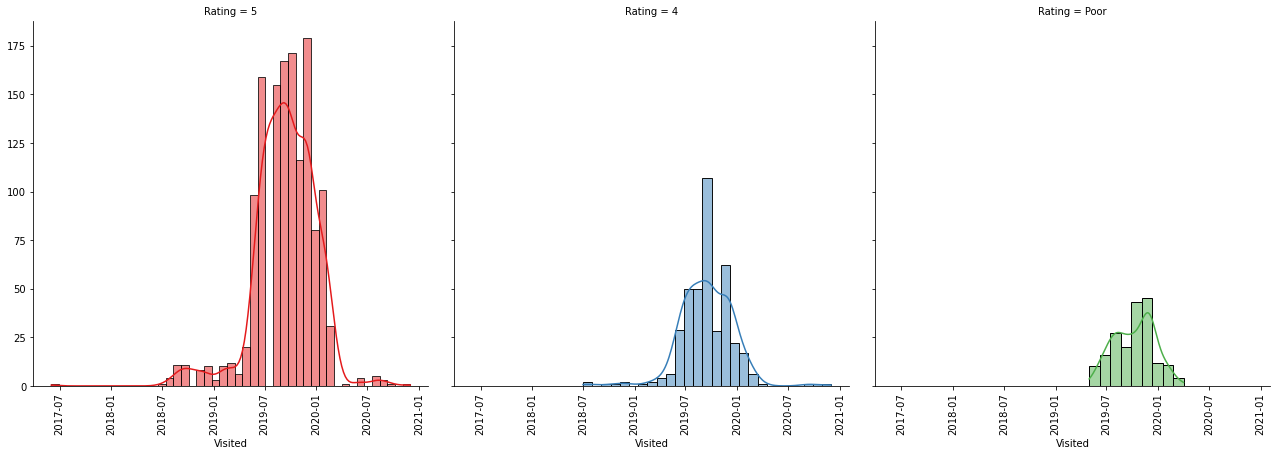

In [108]:
visited_grid_5 = sns.FacetGrid(data=ta_5vspoor_5_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_5.map(sns.histplot, "Visited", kde=True)

visited_grid_5.set_xticklabels(rotation='vertical', fontsize=10)

## Analyzing 5 star reviews on specific month and year

In [109]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('new', 'york'), 14),
 (('central', 'park'), 8),
 (('york', 'city'), 4),
 (('museum', 'world'), 4),
 (('spend', 'day'), 4),
 (('place', 'new'), 3),
 (('art', 'museum'), 3),
 (('half', 'day'), 3),
 (('something', 'new'), 3),
 (('metropolitan', 'museum'), 3)]

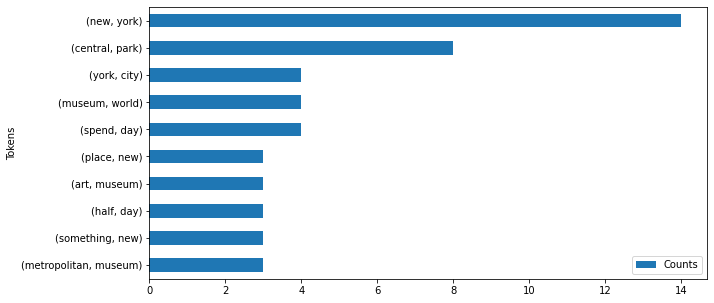

In [110]:
# Graph of 5 Star Bigram

fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

In [111]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

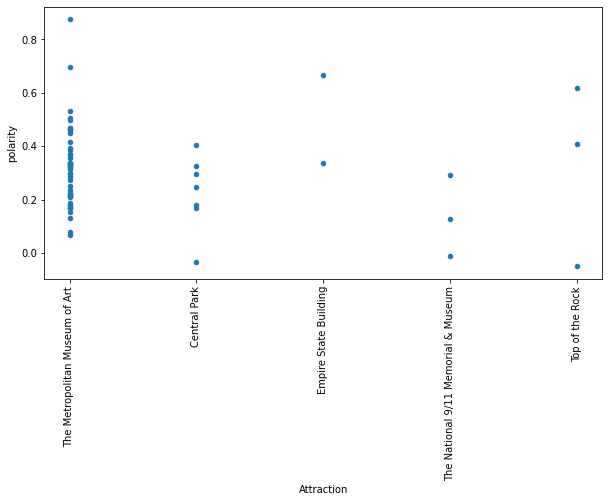

In [112]:
sample = ta_5vspoor_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [113]:
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

In [114]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('new', 'york'), 14),
 (('central', 'park'), 9),
 (('york', 'city'), 4),
 (('museum', 'world'), 4),
 (('spend', 'day'), 4),
 (('place', 'new'), 3),
 (('art', 'museum'), 3),
 (('half', 'day'), 3),
 (('museum', 'much'), 3),
 (('much', 'see'), 3),
 (('something', 'new'), 3),
 (('metropolitan', 'museum'), 3),
 (('temple', 'dendur'), 3),
 (('one', 'favourite'), 2),
 (('could', 'spend'), 2),
 (('visiting', 'new'), 2),
 (('highlight', 'visit'), 2),
 (('park', 'amazing'), 2),
 (('day', 'never'), 2),
 (('beautiful', 'view'), 2)]

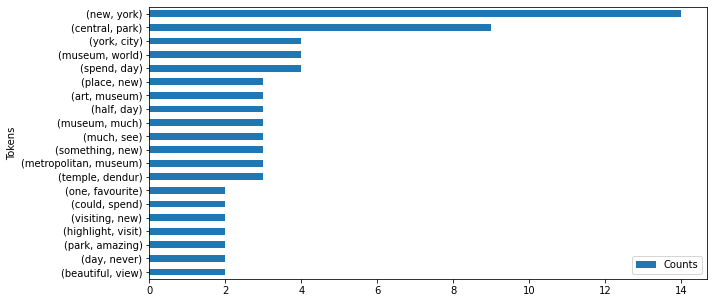

In [115]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

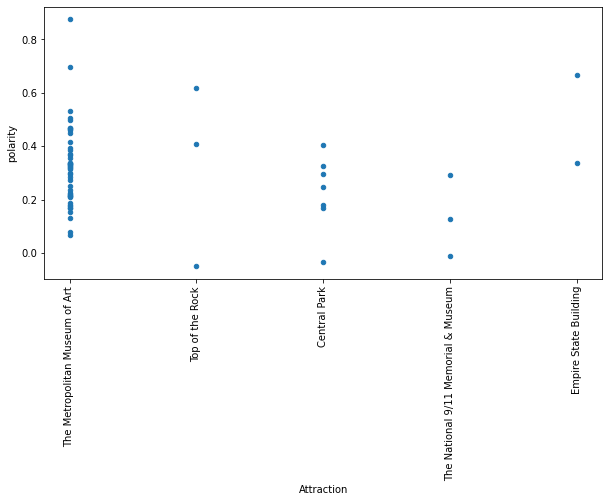

In [116]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

In [117]:
user_loc_df = tripadv[(tripadv['City']=='New York City') &
                     (tripadv['User_Loc2']!='')]
user_loc_agg_df = user_loc_df.groupby('User_Loc2')['Rating'].agg(['count', 'mean', 'std'])
user_loc_agg_df

,count,mean,std
User_Loc2,,,
AK,3,4.666667,0.577350
AL,24,4.833333,0.380693
ALBANIA,1,5.000000,NaN
ALBERTA,2,5.000000,0.000000
ANTIOQUIA,2,5.000000,0.000000
...,...,...,...
WEST MIDLANDS,3,4.000000,1.000000
WESTERN AUSTRALIA,1,5.000000,NaN
WI,28,4.892857,0.314970


In [118]:
user_loc_agg_df_10 = user_loc_agg_df[user_loc_agg_df['count']>=10].sort_values('mean', ascending = False)
user_loc_agg_df_10.head(5)

,count,mean,std
User_Loc2,,,
HUNGARY,10,5.000000,0.000000
OK,15,5.000000,0.000000
DC,19,5.000000,0.000000
AR,17,4.941176,0.242536
CO,33,4.939394,0.242306


In [119]:
user_loc_agg_df_10.tail(5)

,count,mean,std
User_Loc2,,,
ARGENTINA,19,4.473684,0.772328
FINLAND,14,4.428571,1.089410
SPAIN,53,4.377358,1.095909
BELGIUM,24,4.375000,0.769670
WV,13,4.307692,1.031553


In [120]:
ta_loc_1 = user_loc_df[(user_loc_df['User_Loc2']=='HUNGARY') |
                       (user_loc_df['User_Loc2']=='OK') |
                       (user_loc_df['User_Loc2']=='DC') |
                       (user_loc_df['User_Loc2']=='AR') |
                       (user_loc_df['User_Loc2']=='CO')]
ta_loc_1.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
4270,The Metropolitan Museum of Art,New York City,2019-06-01,2019-06-01,47,64,1,5,Absolutely amazing. My recommendations: 1. Go ...,Amazing; HUGE!!,BrianRossignol,DENVER,CO,,,
37469,Central Park,New York City,2019-11-01,2019-11-01,593,117,0,5,If I am in New York I always have a running se...,It is a must for runners,Janos1315,CENTRAL HUNGARY,HUNGARY,,,
36936,Central Park,New York City,2019-10-01,2019-10-01,819,155,0,5,"This park is in the middle of Manhattan, in th...",An Amazing Urban Park,Sara S,OKLAHOMA CITY,OK,,,
5051,The Metropolitan Museum of Art,New York City,2019-10-01,2019-10-01,123,40,1,5,I was there for about 3 hours and it was NOT e...,Make lots of time,Torcatt,WASHINGTON DC,DC,,,
4285,The Metropolitan Museum of Art,New York City,2019-04-01,2019-03-01,247,56,1,5,When you enter the main 5th avenue location (v...,An amazing collection throughout the ages,luv2traveltheworld1,FORT COLLINS,CO,,,
37538,Central Park,New York City,2019-12-01,2019-12-01,30,0,0,5,There were far fewer people on the weekend tha...,Quiet retreat,JenniKateB,DENVER,CO,,,
35370,The National 9/11 Memorial & Museum,New York City,2019-11-01,2019-10-01,7,1,0,5,Listening to all the phone calls to families a...,Fantastic and put together well.,RareDiamondGem,DENVER,CO,,,
6764,Empire State Building,New York City,2020-01-01,2020-01-01,1,0,0,5,Windy but awesome. Found Grandma’s manifest at...,Blown away by NYC,reservation2020,PALISADE,CO,,,
8017,Top of the Rock,New York City,2019-07-01,2019-07-01,215,35,0,5,We go to NYC about every 18 months. Always go ...,My first TOP of the Rock,Kimrayoil,ADA,OK,,,
7440,Empire State Building,New York City,2020-03-01,2020-03-01,1,0,0,5,the overall experience was amazing. The view w...,Amazing Experience,soey13,DENVER,CO,,,


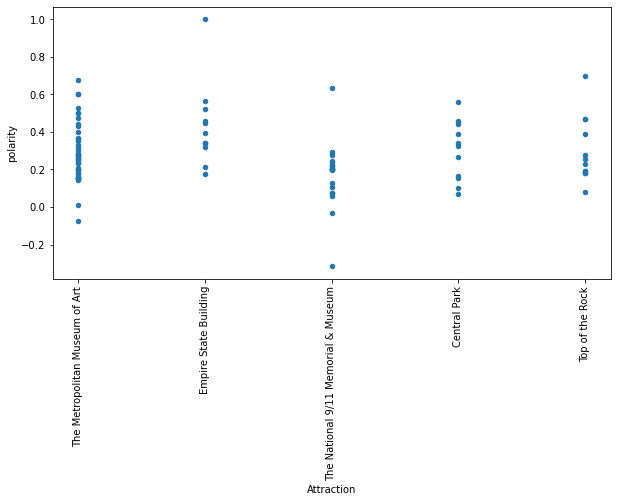

In [121]:
from textblob import TextBlob

sample_size = len(ta_loc_1.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_1.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [122]:
corpus_loc_1 = ' '.join(ta_loc_1['Text']).lower()
tokens_loc_1 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_1) if tokens not in stop_filters]

bigram_loc_1 = list(nltk.bigrams(tokens_loc_1))
fdist_bi_loc_1 = FreqDist(bigram_loc_1)
fdist_bi_loc_1.most_common(10)

[(('empire', 'state'), 13),
 (('state', 'building'), 13),
 (('new', 'york'), 11),
 (('central', 'park'), 9),
 (('must', 'see'), 5),
 (('special', 'exhibit'), 5),
 (('york', 'city'), 4),
 (('take', 'time'), 4),
 (('great', 'view'), 4),
 (('well', 'done'), 4)]

In [123]:
trigram_loc_1 = list(nltk.trigrams(tokens_loc_1))
fdist_tri_loc_1 = FreqDist(trigram_loc_1)
fdist_tri_loc_1.most_common(10)

[(('empire', 'state', 'building'), 13),
 (('new', 'york', 'city'), 4),
 (('take', 'time', 'really'), 2),
 (('visited', 'empire', 'state'), 2),
 (('visit', 'several', 'time'), 2),
 (('must', 'see', 'new'), 2),
 (('see', 'new', 'york'), 2),
 (('important', 'museum', 'world'), 2),
 (('thing', 'wanted', 'see'), 2),
 (('museum', 'without', 'shedded'), 2)]

In [124]:
ta_loc_2 = user_loc_df[(user_loc_df['User_Loc2']=='ARGENTINA') |
                       (user_loc_df['User_Loc2']=='FINLAND') |
                       (user_loc_df['User_Loc2']=='SPAIN') |
                       (user_loc_df['User_Loc2']=='BELGIUM') |
                       (user_loc_df['User_Loc2']=='WV')]
ta_loc_2.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
6753,Empire State Building,New York City,2020-01-01,2020-01-01,"2,790",341,0,5,One cannot leave NY without visiting this buil...,A NY must visit,BeachStone2C,HELSINKI,FINLAND,,,
8661,Top of the Rock,New York City,2019-10-01,2019-10-01,916,73,1,5,There was a long line outside but found inside...,Best views in NYC,Mikajii,VANTAA,FINLAND,,,
9010,Top of the Rock,New York City,2019-11-01,2019-11-01,36,29,1,5,"We had our sight seeing pass, so we didn't hav...",Lovely,Jade O'Neill,PAMPLONA,SPAIN,,,
4952,The Metropolitan Museum of Art,New York City,2020-02-01,2020-02-01,488,108,2,5,"This place is huge, and people who love art ca...",Incredible collection of high-end art,Erbee64,LEUVEN,BELGIUM,,,
35902,The National 9/11 Memorial & Museum,New York City,2019-12-01,2019-12-01,2,0,0,5,Museum with a great audio-tour. Sincere and wi...,Must visit when in NY,Kenneth Desloovere,EVERGEM,BELGIUM,,,
9345,Top of the Rock,New York City,2020-01-01,2020-01-01,2,2,1,1,Really poorly organized ticket system. Even if...,Really inconvenient,evievikivi,HELSINKI,FINLAND,,,
4010,The Metropolitan Museum of Art,New York City,2019-06-01,2019-06-01,156,54,1,4,We enjoyed our time at this museum. Many varie...,A few days to see them all..,Lazyism,ANTWERP,BELGIUM,,,
36005,The National 9/11 Memorial & Museum,New York City,2020-01-01,2019-11-01,38,21,0,4,It's a must. It's very well organized and has ...,Very telling,marive05,BUENOS AIRES,ARGENTINA,,,
9381,Top of the Rock,New York City,2020-01-01,2019-12-01,28,57,2,5,Booked go at night and so glad we did. Fantast...,Great experience,Spanishblue,ORIHUELA COSTA,SPAIN,,,
36867,Central Park,New York City,2019-10-01,2019-10-01,916,73,0,5,"Huge park to go for a run, picnic or just peop...",Great place to spend time,Mikajii,VANTAA,FINLAND,,,


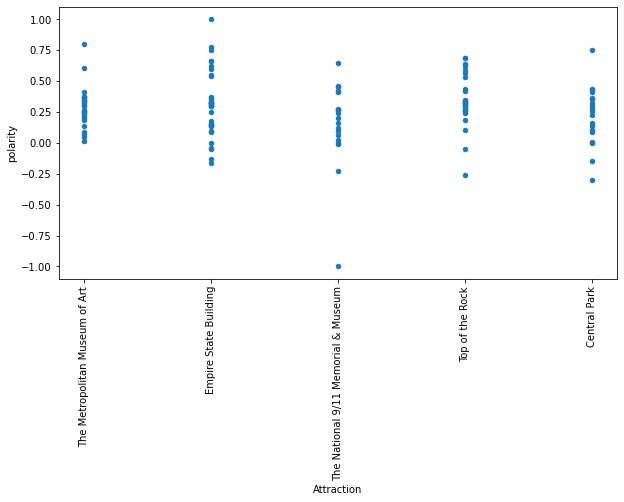

In [125]:
from textblob import TextBlob

sample_size = len(ta_loc_2.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_2.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- We might be seeing that the reason why there are so many positive reviews in the top 5 count is that a lot of them went to Fenway
- we might want to consider how we market to different groups based on these grams

In [126]:
corpus_loc_2 = ' '.join(ta_loc_2['Text']).lower()
tokens_loc_2 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_2) if tokens not in stop_filters]

bigram_loc_2 = list(nltk.bigrams(tokens_loc_2))
fdist_bi_loc_2 = FreqDist(bigram_loc_2)
fdist_bi_loc_2.most_common(10)

[(('new', 'york'), 26),
 (('empire', 'state'), 16),
 (('central', 'park'), 14),
 (('state', 'building'), 13),
 (('one', 'day'), 7),
 (('top', 'rock'), 7),
 (('view', 'amazing'), 6),
 (('place', 'visit'), 6),
 (('walk', 'around'), 4),
 (('many', 'different'), 4)]

In [127]:
trigram_loc_2 = list(nltk.trigrams(tokens_loc_2))
fdist_tri_loc_2 = FreqDist(trigram_loc_2)
fdist_tri_loc_2.most_common(10)

[(('empire', 'state', 'building'), 13),
 (('horse', 'drawn', 'carriage'), 3),
 (('visit', 'central', 'park'), 3),
 (('view', 'new', 'york'), 3),
 (('visit', 'empire', 'state'), 3),
 (('visit', 'new', 'york'), 3),
 (('whilst', 'new', 'york'), 3),
 (('around', 'central', 'park'), 2),
 (('sight', 'seeing', 'pas'), 2),
 (('see', 'many', 'different'), 2)]